# Connect and Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Machine Learning Project'

/content/drive/MyDrive/Colab Notebooks/Machine Learning Project


In [ ]:
# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append('audiomanip')

# Audio Feature Extraction and Exploration

**Code sourced from [this Github](https://github.com/HareeshBahuleyan/music-genre-classification). Many modifications needed to be made to get functions to work and to adapt to my dataset**

In [ ]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
from PIL import Image
from matplotlib.pyplot import imshow

%matplotlib inline

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Machine Learning Project/dataset/GTZAN/rock/rock.00012.wav', sr = 22050)

Preview Audio

In [ ]:
Audio(y, rate=sr)

Display the audio wave

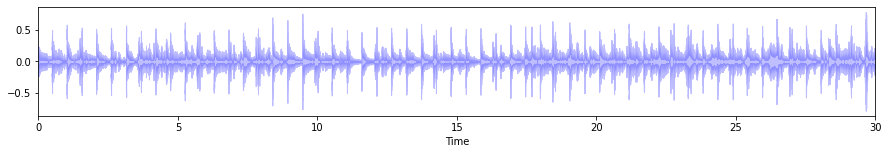

In [ ]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,
                     sr     = sr, 
                     max_sr = 1000, 
                     alpha  = 0.25, 
                     color  = 'blue')

Apply a Pre-emphasis Filter

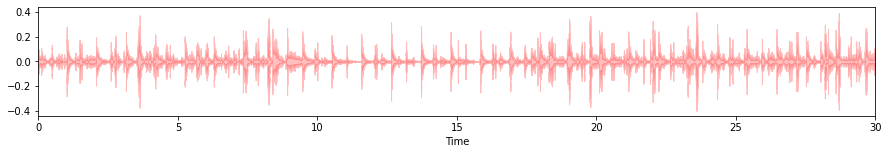

In [ ]:
pre_emphasis = 0.97
y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,
                     sr     = sr, 
                     max_sr = 1000, 
                     alpha  = 0.25, 
                     color  = 'red')

Fourier Transform - Linear Amplitudes

FT Shape (1025, 1293)


Text(0.5, 1.0, 'Linear Amplitude')

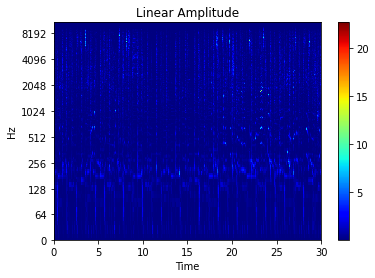

In [ ]:
D = librosa.stft(y, n_fft = 2048, hop_length = 512)
print('FT Shape', D.shape)

# Y-axis can be linear or log or mel
librosa.display.specshow(np.abs(D), x_axis='time', y_axis='log', cmap=cm.jet,) # Take magnitude of complex number
plt.colorbar()
plt.title('Linear Amplitude')

Fourier Transform - Log Amplitude

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


Text(0.5, 1.0, 'Log Amplitude')

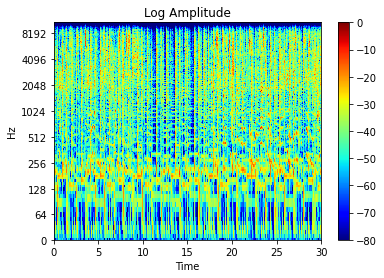

In [ ]:
log_amplitude = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Amplitude')

Fourier Transform - Log Power

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


Text(0.5, 1.0, 'Log Power')

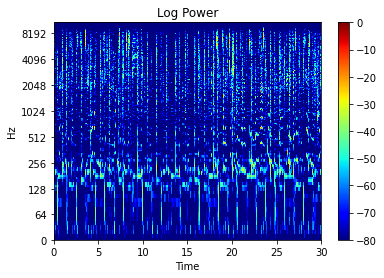

In [ ]:
log_amplitude = librosa.amplitude_to_db(D**2, ref=np.max) # Square amplitude and then take log
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Power')

CQT Transform

Transform shape (84, 1293)


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


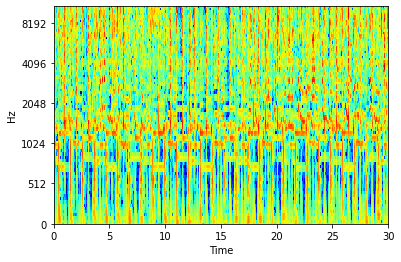

In [ ]:
C = librosa.cqt(y, sr=sr, n_bins=84)
print('Transform shape', C.shape) 
log_amplitude = librosa.amplitude_to_db(C, ref=np.max)
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='mel', cmap=cm.jet)

MEL Spectrogram

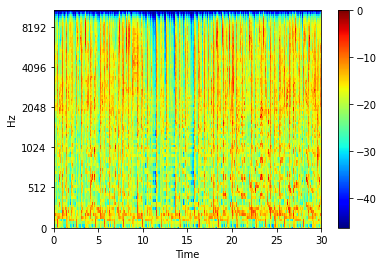

In [ ]:
M = librosa.feature.melspectrogram(y, sr, fmax = sr/2, n_fft=2048, hop_length=512, 
                                   n_mels = 96, power = 1)
                                                           # Hanning window by default
log_power = librosa.power_to_db(M, ref=np.max)# Covert to dB (log) scale
librosa.display.specshow(log_power, x_axis='time', y_axis='mel', cmap=cm.jet)
plt.colorbar()

Save and Load the Image

In [ ]:
pylab.figure(figsize=(3,3))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
librosa.display.specshow(log_power, cmap=cm.jet)
pylab.savefig('test.jpg', bbox_inches=None, pad_inches=0)
pylab.close()

In [ ]:
im = Image.open("test.jpg", )
np.asarray(im).shape

(216, 216, 3)

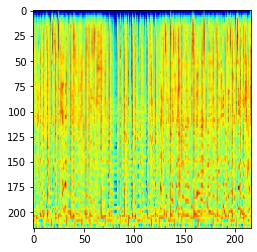

In [ ]:
imshow(np.asarray(im))

In [ ]:
import os
import librosa
from librosa import display
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import pylab

Convert all of the .wav files to MEL Spectrograms

In [ ]:
WAV_DIR = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Project/dataset/GTZAN/'
IMG_DIR = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Project/spectrogram_images'
r = []
for root, dirs, files in os.walk(WAV_DIR):
    for name in files:
        r.append(os.path.join(root, name))
r = r[15:]

In [ ]:
i = 0
folder = 'rock'
for f in r:
    try:
        # Read wav-file
        y, sr = librosa.load(f, sr = 22050) # Use the default sampling rate of 22,050 Hz
        
        # Compute spectrogram
        M = librosa.feature.melspectrogram(y, sr, 
                                           fmax = sr/2, # Maximum frequency to be used on the on the MEL scale
                                           n_fft=2048, 
                                           hop_length=512, 
                                           n_mels = 96, # Set as per the Google Large-scale audio CNN paper
                                           power = 2) # Power = 2 refers to squared amplitude
        
        # Power in DB
        log_power = librosa.power_to_db(M, ref=np.max)# Covert to dB (log) scale
        
        # Plotting the spectrogram
        pylab.figure(figsize=(5,5))
        pylab.axis('off') 
        pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
        librosa.display.specshow(log_power, cmap=cm.jet)
        pylab.savefig(IMG_DIR + '/' + folder + f[-9:-4] +'.jpg', bbox_inches=None, pad_inches=0)
        pylab.close()
        i += 1

        # Logic to keep img names consistent
        if i == 100:
          folder = 'reggae'
        elif i == 200:
          folder = 'hiphop'
        elif i == 300:
          folder = 'pop'
        elif i == 400:
          folder = 'blues'
        elif i == 500:
          folder = 'classical'
        elif i == 600:
          folder = 'disco'
        elif i == 700:
          folder = 'jazz'
        elif i == 800:
          folder = 'country'
        elif i == 900:
          folder = 'metal'
    except Exception as e:
        print(f, e)
        pass

## Time Domain Features

In [ ]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
import scipy
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
print('Signal mean = {:.2f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.2f}'.format(np.std(y)))
print('Signal skewness = {:.2f}'.format(scipy.stats.skew(abs(y))))
print('Signal kurtosis = {:.2f}'.format(scipy.stats.kurtosis(y)))

Signal mean = 0.11
Signal std dev = 0.15
Signal skewness = 2.46
Signal kurtosis = 4.37


**Zero Crossing Rate**

ZCR mean = 0.12
ZCR std dev = 0.06


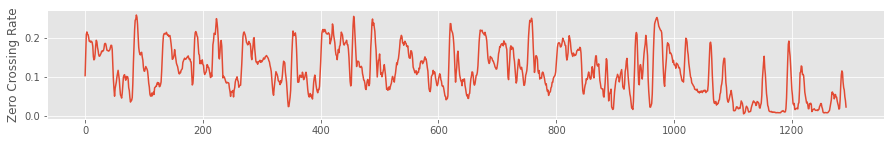

In [ ]:
# Add a small constant before computing the zero crossing rate to disregard unwanted silence 'noise'
zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
plt.figure(figsize=(15,2))
plt.plot(zcr)
plt.ylabel('Zero Crossing Rate')
print('ZCR mean = {:.2f}'.format(np.mean(zcr)))
print('ZCR std dev = {:.2f}'.format(np.std(zcr)))

**Root Mean Squared Energy**

Text(0.5, 1.0, 'log power spectrogram')

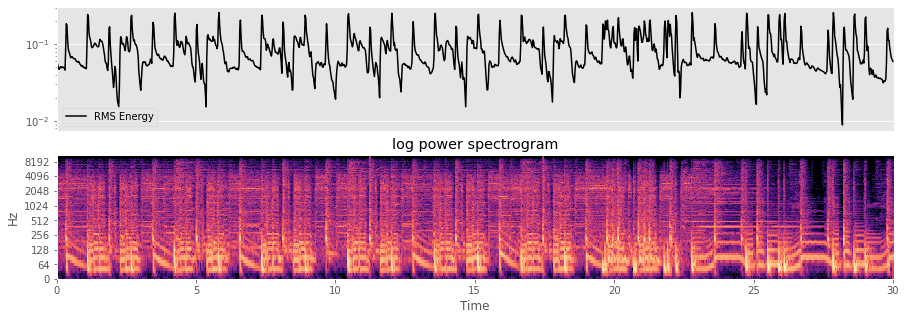

In [ ]:
S, phase = librosa.magphase(librosa.stft(y)) # compute magnitude and phase content
rms = librosa.feature.rms(S=S) # compute root-mean-square for each frame in magnitude

plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy', color="black")
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                            y_axis='log', x_axis='time')
plt.title('log power spectrogram')

## Spectral Features

**Spectral Centroid**

Spectral Centroid mean = 2211.59
Spectral Centroid std dev = 624.82


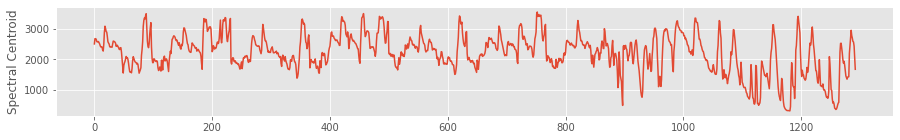

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_centroids)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_centroids)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_centroids)))

**Spectral Bandwidth**

Spectral Bandwidth-2 mean = 2115.42
Spectral Bandwidth-2 std dev = 358.81
Spectral Bandwidth-3 mean = 2538.41
Spectral Bandwidth-3 std dev = 319.04
Spectral Bandwidth-4 mean = 2937.29
Spectral Bandwidth-4 std dev = 298.09


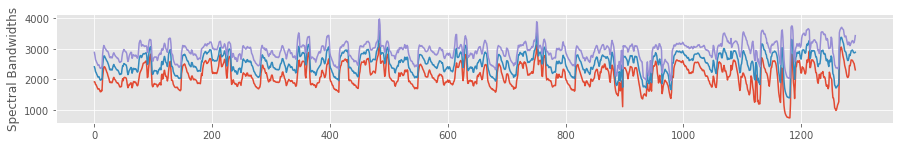

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_bandwidth_2)
plt.plot(spectral_bandwidth_3)
plt.plot(spectral_bandwidth_4)
plt.ylabel('Spectral Bandwidths')
print('Spectral Bandwidth-2 mean = {:.2f}'.format(np.mean(spectral_bandwidth_2)))
print('Spectral Bandwidth-2 std dev = {:.2f}'.format(np.std(spectral_bandwidth_2)))
print('Spectral Bandwidth-3 mean = {:.2f}'.format(np.mean(spectral_bandwidth_3)))
print('Spectral Bandwidth-3 std dev = {:.2f}'.format(np.std(spectral_bandwidth_3)))
print('Spectral Bandwidth-4 mean = {:.2f}'.format(np.mean(spectral_bandwidth_4)))
print('Spectral Bandwidth-4 std dev = {:.2f}'.format(np.std(spectral_bandwidth_4)))

**Spectral Contrast**

Means [24.32817449 14.08303255 16.43053241 15.88890983 16.16295355 17.59426155
 40.25409512]
Std devs [5.19185584 4.61555567 4.98552372 3.62875507 2.61243828 2.59646034
 4.88082907]


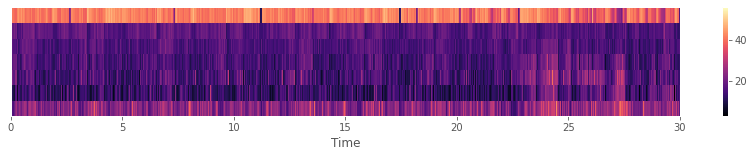

In [ ]:
spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
plt.figure(figsize=(15,2))
librosa.display.specshow(spectral_contrast, x_axis='time')
plt.colorbar()
print('Means', np.mean(spectral_contrast, axis=1)) # Values are on dB scale
print('Std devs', np.std(spectral_contrast, axis=1))

**Spectral Roll-Off**

Spectral Centroid mean = 4457.51
Spectral Centroid std dev = 1261.71


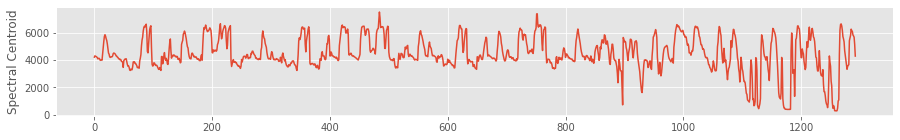

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr, roll_percent = 0.85)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_rolloff)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_rolloff)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_rolloff)))

**Mel-Frequency Cepstral Coefficients**

Means [-95.36451    92.07968   -28.031654   52.79045    -3.017644   25.402498
  -6.1292963  20.092642  -10.224361   12.404398   -8.270611   11.691971
  -9.26448  ]
Std devs [80.39564  20.795673 31.504507  9.693665 11.698432 11.141124 11.197163
  9.271683  8.229416  8.380734  6.86647   6.513068  7.348835]


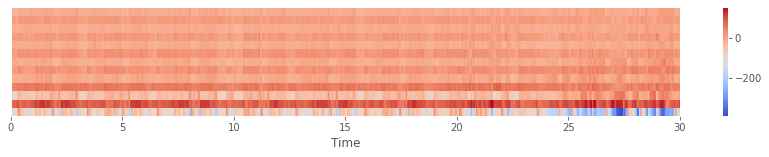

In [ ]:
mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=13)
plt.figure(figsize=(15,2))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
print('Means', np.mean(mfccs, axis=1)) 
print('Std devs', np.std(mfccs, axis=1))

**Chroma Features**

Means [0.48998192 0.5640259  0.5905256  0.47099853 0.49459597 0.5045895
 0.5887216  0.6460259  0.48320118 0.42197302 0.4035486  0.46901593]
Std devs [0.2663401  0.2832258  0.30116364 0.24441248 0.28886628 0.27011845
 0.26907602 0.24633032 0.22992557 0.28950354 0.2649374  0.26815534]


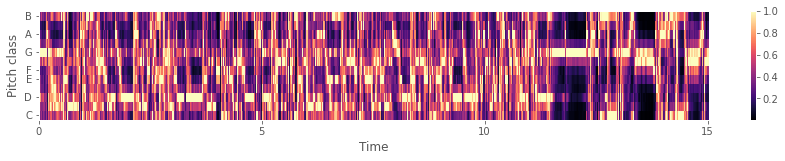

In [ ]:
chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
print('Means', np.mean(chroma_stft, axis=1)) 
print('Std devs', np.std(chroma_stft, axis=1))

Means [0.48271313 0.4483603  0.49772233 0.49188906 0.6378365  0.6235713
 0.8220571  0.5920564  0.47832555 0.52218735 0.4188547  0.4881607 ]
Std devs [0.22920543 0.17784925 0.23422842 0.21981156 0.26537648 0.23004398
 0.21637826 0.24422996 0.21749666 0.2789761  0.20345742 0.2333939 ]


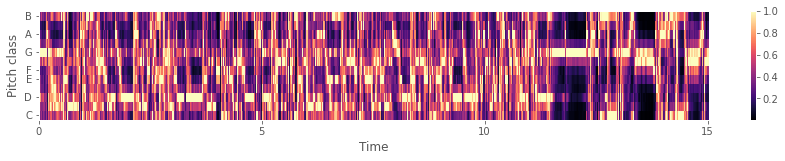

In [ ]:
chroma_cqt = librosa.feature.chroma_cqt(y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
print('Means', np.mean(chroma_cqt, axis=1)) 
print('Std devs', np.std(chroma_cqt, axis=1))

Means [0.22501399 0.21949404 0.243969   0.23811568 0.31635233 0.33161159
 0.44030659 0.31092185 0.22384839 0.24021298 0.18305801 0.22439124]
Std devs [0.07382238 0.08258429 0.07781737 0.08157309 0.10458652 0.08176392
 0.1311189  0.09720451 0.06483905 0.09115746 0.06329858 0.08334907]


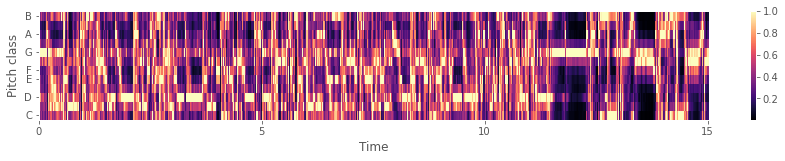

In [ ]:
chroma_cens = librosa.feature.chroma_cens(y, sr=sr, hop_length=512)
plt.figure(figsize=(15,2))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
print('Means', np.mean(chroma_cens, axis=1)) 
print('Std devs', np.std(chroma_cens, axis=1))

In [ ]:
import os
import numpy as np
import pandas as pd
import scipy
import librosa
from tqdm import tqdm

In [ ]:
WAV_DIR = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Project/dataset/GTZAN/'
IMG_DIR = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Project/spectrogram_images'
r = []
for root, dirs, files in os.walk(WAV_DIR):
    for name in files:
        r.append(os.path.join(root, name))
r = r[15:]

In [ ]:
col_names = ['file_name', 'signal_mean', 'signal_std', 'signal_skew', 'signal_kurtosis', 
             'zcr_mean', 'zcr_std', 'rmse_mean', 'rmse_std', 'tempo',
             'spectral_centroid_mean', 'spectral_centroid_std',
             'spectral_bandwidth_2_mean', 'spectral_bandwidth_2_std',
             'spectral_bandwidth_3_mean', 'spectral_bandwidth_3_std',
             'spectral_bandwidth_4_mean', 'spectral_bandwidth_4_std'] + \
            ['spectral_contrast_' + str(i+1) + '_mean' for i in range(7)] + \
            ['spectral_contrast_' + str(i+1) + '_std' for i in range(7)] + \
            ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)] + \
            ['chroma_stft_' + str(i+1) + '_mean' for i in range(12)] + \
            ['chroma_stft_' + str(i+1) + '_std' for i in range(12)] 
            
df = pd.DataFrame(columns=col_names)

In [ ]:
#print(WAV_DIR+folder+f)
slc = -14
i = 0
for i in range(len(r)):
  i += 1
  if i == 100:
    slc = -16
  elif i == 300:
    slc = -13
  elif i == 400 or i == 600 or i == 900:
    slc = -15
  elif i == 500:
    slc = -19
  elif i == 700:
    slc = -14
  elif i == 800:
    slc = -17

In [ ]:
folder = 'rock/'
i = 0
slc = -14
feature_list = []
for f in r:
    try:
        # Read wav-file
        y, sr = librosa.load(f, sr = 22050)
        print(f[slc:])
        feature_list = [f[slc:]]

        feature_list.append(np.mean(abs(y)))
        feature_list.append(np.std(y))
        feature_list.append(scipy.stats.skew(abs(y)))
        feature_list.append(scipy.stats.kurtosis(y))

        zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
        feature_list.append(np.mean(zcr))
        feature_list.append(np.std(zcr))

        rmse = librosa.feature.rms(y + 0.0001)[0]
        feature_list.append(np.mean(rmse))
        feature_list.append(np.std(rmse))
        
        tempo = librosa.beat.tempo(y, sr=sr)
        feature_list.extend(tempo)

        spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
        feature_list.append(np.mean(spectral_centroids))
        feature_list.append(np.std(spectral_centroids))

        spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
        spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
        spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
        feature_list.append(np.mean(spectral_bandwidth_2))
        feature_list.append(np.std(spectral_bandwidth_2))
        feature_list.append(np.mean(spectral_bandwidth_3))
        feature_list.append(np.std(spectral_bandwidth_3))
        feature_list.append(np.mean(spectral_bandwidth_3))
        feature_list.append(np.std(spectral_bandwidth_3))

        spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
        feature_list.extend(np.mean(spectral_contrast, axis=1))
        feature_list.extend(np.std(spectral_contrast, axis=1))

        spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr, roll_percent = 0.85)[0]
        feature_list.append(np.mean(spectral_rolloff))
        feature_list.append(np.std(spectral_rolloff))

        mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
        feature_list.extend(np.mean(mfccs, axis=1))
        feature_list.extend(np.std(mfccs, axis=1))

        chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
        feature_list.extend(np.mean(chroma_stft, axis=1))
        feature_list.extend(np.std(chroma_stft, axis=1))
        
        feature_list[1:] = np.round(feature_list[1:], decimals=3)
        
        # Logic to slice the filenames at proper location
        i += 1
        if i == 100:
          slc = -16
        elif i == 300:
          slc = -13
        elif i == 400 or i == 600 or i == 900:
          slc = -15
        elif i == 500:
          slc = -19
        elif i == 700:
          slc = -14
        elif i == 800:
          slc = -17
      
    except:
        pass
    
    df = df.append(pd.DataFrame(feature_list, index=col_names).transpose(), ignore_index=True)

# Save file
df.to_csv('df_features.csv', index=False)

rock.00007.wav
rock.00004.wav
rock.00000.wav
rock.00012.wav
rock.00008.wav
rock.00003.wav
rock.00010.wav
rock.00001.wav
rock.00006.wav
rock.00005.wav
rock.00011.wav
rock.00002.wav
rock.00009.wav
rock.00015.wav
rock.00027.wav
rock.00024.wav
rock.00033.wav
rock.00022.wav
rock.00019.wav
rock.00016.wav
rock.00025.wav
rock.00021.wav
rock.00028.wav
rock.00031.wav
rock.00020.wav
rock.00029.wav
rock.00030.wav
rock.00014.wav
rock.00023.wav
rock.00018.wav
rock.00032.wav
rock.00013.wav
rock.00026.wav
rock.00017.wav
rock.00049.wav
rock.00039.wav
rock.00040.wav
rock.00036.wav
rock.00042.wav
rock.00045.wav
rock.00044.wav
rock.00041.wav
rock.00046.wav
rock.00038.wav
rock.00047.wav
rock.00034.wav
rock.00037.wav
rock.00043.wav
rock.00048.wav
rock.00035.wav
rock.00058.wav
rock.00062.wav
rock.00055.wav
rock.00051.wav
rock.00060.wav
rock.00053.wav
rock.00054.wav
rock.00056.wav
rock.00050.wav
rock.00052.wav
rock.00057.wav
rock.00059.wav
rock.00061.wav
rock.00064.wav
rock.00067.wav
rock.00066.wav
rock.00073

# Models Based on Extracted Audio Features

**Code sourced from [same Github as earlier section](https://github.com/HareeshBahuleyan/music-genre-classification). Many modifications needed to be made to get functions to work, and to adapt to my dataset**

## Load Audio Features from Previously Saved .csv

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import itertools
import pickle
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from scipy import interp
from itertools import cycle

# matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline

**Load the Features from the Previously Saved .csv**

In [ ]:
df = pd.read_csv('df_features.csv')
print(df.shape)
df.head()

(1000, 98)


file_name  signal_mean  ...  chroma_stft_11_std  chroma_stft_12_std
0  rock.00007.wav        0.124  ...               0.214               0.226
1  rock.00004.wav        0.169  ...               0.278               0.231
2  rock.00000.wav        0.102  ...               0.234               0.226
3  rock.00012.wav        0.058  ...               0.312               0.341
4  rock.00008.wav        0.211  ...               0.248               0.279

[5 rows x 98 columns]

In [ ]:
label_dict = {
              'blues': 0,
              'classical':1,
              'country':2,
              'disco':3,
              'hiphop':4,
              'jazz':5,
              'metal':6,
              'pop':7,
              'reggae':8,
              'rock':9
}

# Normalization of the features
scalar = MinMaxScaler()
df[df.columns[1:]] = scalar.fit_transform(df[df.columns[1:]])
df['label'] = df['file_name'].apply(lambda x: label_dict[x[:-10].split('_')[0]])
df.head()

file_name  signal_mean  ...  chroma_stft_12_std  label
0  rock.00007.wav     0.373832  ...            0.367925      9
1  rock.00004.wav     0.514019  ...            0.383648      9
2  rock.00000.wav     0.305296  ...            0.367925      9
3  rock.00012.wav     0.168224  ...            0.729560      9
4  rock.00008.wav     0.644860  ...            0.534591      9

[5 rows x 99 columns]

In [ ]:
# Train-test split of files # Same split as used for VGG model
with open('testset_filenames.txt', 'r') as f:
    test_files = f.readlines()
test_files = [t.strip() for t in test_files]

for i in range(len(test_files)):
  sl1 = test_files[i][:-9]
  sl2 = test_files[i][-9:-3]
  test_files[i] = sl1 + '.' + sl2 + 'wav'

indices = []
for t in test_files:
    indices.append(df[df.file_name==t].index[0])

df_test = df.iloc[indices]
df.drop(labels=indices, inplace=True)

cl_weight = dict(pd.Series(df['label']).value_counts(normalize=True))

x_train = df[df.columns[1:-1]]
x_test = df_test[df.columns[1:-1]]
y_train = df['label']
y_test = df_test['label']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
       
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm = True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(label_dict))
    print('Test Set Accuracy =  {0:.2f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.2f}'.format(f1_score(y_test, pred, average='macro')))
    print('ROC AUC = {0:.3f}'.format(roc_auc_score(y_true=one_hot_true, y_score=pred_probs, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=label_dict.keys())


## Logistic Regression Model for Genre Classification Using Audio Features

Test Set Accuracy =  0.75
Test Set F-score =  0.74
ROC AUC = 0.953
Confusion matrix, without normalization
[[14  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 3  0  8  1  0  0  0  2  1  0]
 [ 0  0  1 12  2  0  0  0  2  1]
 [ 0  0  1  0 11  0  1  1  2  0]
 [ 1  0  0  0  0 10  0  0  0  2]
 [ 0  0  0  1  0  0 19  0  0  0]
 [ 0  0  2  0  0  0  0 10  0  0]
 [ 0  0  2  1  2  0  0  0  6  2]
 [ 1  0  3  1  0  0  1  1  0  9]]
Training Accuracy:  0.8482352941176471


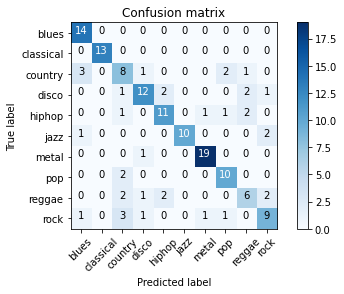

In [ ]:
# Train
lr_classifier = LogisticRegression(penalty='l2', max_iter=100, solver='newton-cg')
lr_classifier.fit(x_train, y_train)

# Predict
pred_probs = lr_classifier.predict_proba(x_test)

# Get mean accuracy of training data
train_score = lr_classifier.score(x_train, y_train)

# Results
display_results(y_test, pred_probs)

print("Training Accuracy: ", train_score)

# Save
with open('pred_probas/lr_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
labels = np.argmax(pred_probs, axis=-1)  
stats  = precision_recall_fscore_support(y_true=y_test, y_pred=labels)
print("per class precision: ", stats[0])
print("per class recall: ", stats[1])
print("per class fscore: ", stats[2])

per class precision:  [0.73684211 1.         0.47058824 0.75       0.73333333 1.
 0.9047619  0.71428571 0.54545455 0.64285714]
per class recall:  [1.         1.         0.53333333 0.66666667 0.6875     0.76923077
 0.95       0.83333333 0.46153846 0.5625    ]
per class fscore:  [0.84848485 1.         0.5        0.70588235 0.70967742 0.86956522
 0.92682927 0.76923077 0.5        0.6       ]


## Random Forest Model for Genre Classification Using Audio Features

Test Set Accuracy =  0.78
Test Set F-score =  0.78
ROC AUC = 0.955
Confusion matrix, without normalization
[[13  0  0  1  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 1  1 12  0  0  0  0  0  1  0]
 [ 0  0  0 12  1  0  0  1  2  2]
 [ 0  0  1  0 12  0  0  0  3  0]
 [ 0  1  1  0  0 10  0  0  0  1]
 [ 0  0  0  1  0  0 19  0  0  0]
 [ 0  0  2  1  0  0  0  9  0  0]
 [ 0  0  2  1  0  0  0  1  7  2]
 [ 0  1  3  1  0  0  0  0  1 10]]
Training Accuracy:  0.9988235294117647


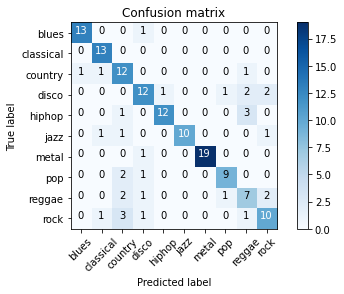

In [ ]:
# Train
rf_classifier = RandomForestClassifier(n_estimators=500, min_samples_split=5)
rf_classifier.fit(x_train, y_train)

# Predict
pred_probs = rf_classifier.predict_proba(x_test)

# Get mean accuracy of training data
train_score = rf_classifier.score(x_train, y_train)

# Results
display_results(y_test, pred_probs)

print("Training Accuracy: ", train_score)

# Save
with open('pred_probas/rf_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
labels = np.argmax(pred_probs, axis=-1)  
stats  = precision_recall_fscore_support(y_true=y_test, y_pred=labels)
print("per class precision: ", stats[0])
print("per class recall: ", stats[1])
print("per class fscore: ", stats[2])

per class precision:  [0.92857143 0.8125     0.57142857 0.70588235 0.92307692 1.
 1.         0.81818182 0.5        0.66666667]
per class recall:  [0.92857143 1.         0.8        0.66666667 0.75       0.76923077
 0.95       0.75       0.53846154 0.625     ]
per class fscore:  [0.92857143 0.89655172 0.66666667 0.68571429 0.82758621 0.86956522
 0.97435897 0.7826087  0.51851852 0.64516129]


## Gradient Boosting Model for Genre Classification Using Audio Features

Test Set Accuracy =  0.70
Test Set F-score =  0.70
ROC AUC = 0.943
Confusion matrix, without normalization
[[10  0  2  0  0  0  1  0  0  1]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 1  1 10  0  0  0  0  0  1  2]
 [ 0  0  0 12  2  0  1  0  2  1]
 [ 0  0  1  1 11  0  0  1  1  1]
 [ 1  0  0  0  0 11  0  0  0  1]
 [ 1  0  0  0  1  0 18  0  0  0]
 [ 0  0  1  1  1  0  0  9  0  0]
 [ 1  0  2  1  0  0  1  1  5  2]
 [ 4  1  2  2  0  0  0  1  0  6]]
0.9988235294117647


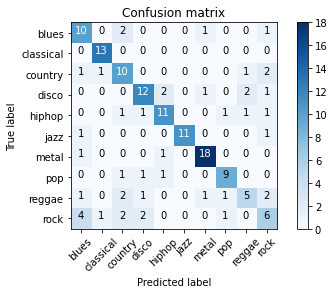

In [ ]:
# Train
xgb_classifier = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, objective='multi:softprob', 
                                   n_estimators=500, sub_sample = 0.8, num_class = len(label_dict))
xgb_classifier.fit(x_train, y_train)

# Predict
pred_probs = xgb_classifier.predict_proba(x_test)

train_scores = xgb_classifier.score(x_train, y_train)

# Results
display_results(y_test, pred_probs)

print(train_scores)

# Save
with open('pred_probas/xgb_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
labels = np.argmax(pred_probs, axis=-1)  
stats  = precision_recall_fscore_support(y_true=y_test, y_pred=labels)
print("per class precision: ", stats[0])
print("per class recall: ", stats[1])
print("per class fscore: ", stats[2])

per class precision:  [0.61111111 0.86666667 0.52941176 0.63157895 0.75       1.
 0.94736842 0.8        0.6        0.4375    ]
per class recall:  [0.78571429 1.         0.6        0.66666667 0.75       0.76923077
 0.9        0.66666667 0.46153846 0.4375    ]
per class fscore:  [0.6875     0.92857143 0.5625     0.64864865 0.75       0.86956522
 0.92307692 0.72727273 0.52173913 0.4375    ]


## Support Vector Machines Model for Genre Classification Using Audio Features

Test Set Accuracy =  0.77
Test Set F-score =  0.76
ROC AUC = 0.969
Confusion matrix, without normalization
[[11  0  1  1  0  0  0  0  0  1]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  1 11  1  0  0  0  1  1  0]
 [ 0  0  0 14  0  0  0  0  2  2]
 [ 0  0  0  0 12  0  0  0  4  0]
 [ 0  1  1  0  0 11  0  0  0  0]
 [ 0  0  0  1  0  0 19  0  0  0]
 [ 0  0  1  1  0  0  0  7  3  0]
 [ 0  0  1  1  1  0  0  1  7  2]
 [ 1  1  2  0  0  0  1  1  0 10]]
Training Accuracy:  0.9988235294117647


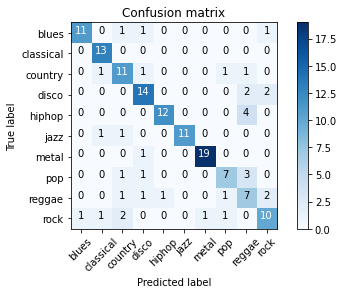

In [ ]:
# Train
svm_classifier = SVC(C=10000.0, probability = True, class_weight=cl_weight, kernel='rbf')
svm_classifier.fit(x_train, y_train)

# Predict
pred_probs = svm_classifier.predict_proba(x_test)

train_score = svm_classifier.score(x_train, y_train)
# Results
display_results(y_test, pred_probs)

print("Training Accuracy: ", train_score)
# Save
with open('pred_probas/svm_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
labels = np.argmax(pred_probs, axis=-1)  
stats  = precision_recall_fscore_support(y_true=y_test, y_pred=labels)
print("per class precision: ", stats[0])
print("per class recall: ", stats[1])
print("per class fscore: ", stats[2])

per class precision:  [0.91666667 0.8125     0.64705882 0.73684211 0.92307692 1.
 0.95       0.7        0.41176471 0.66666667]
per class recall:  [0.78571429 1.         0.73333333 0.77777778 0.75       0.84615385
 0.95       0.58333333 0.53846154 0.625     ]
per class fscore:  [0.84615385 0.89655172 0.6875     0.75675676 0.82758621 0.91666667
 0.95       0.63636364 0.46666667 0.64516129]


## Determining Most Important Audio Features for Classification

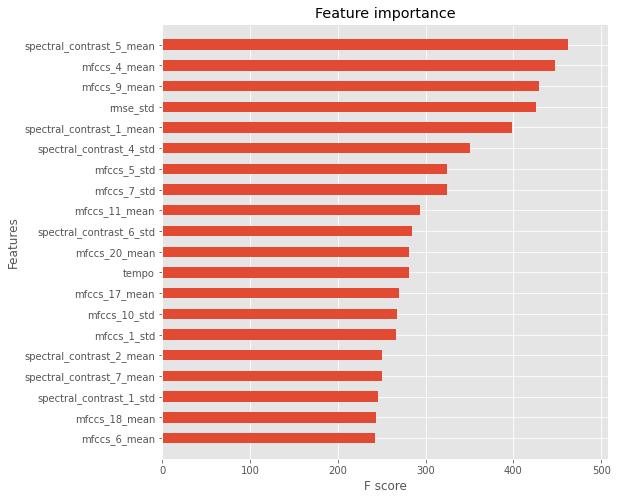

In [ ]:
ax = xgb.plot_importance(xgb_classifier, max_num_features=20, height=0.5, show_values=False)
fig = ax.figure
fig.set_size_inches(8, 8)
plt.savefig('plots/feature-imp.png', bbox_inches='tight')

In [ ]:
contribution_scores = xgb_classifier.feature_importances_
contribution_scores

array([0.05286297, 0.02793093, 0.00900948, 0.00683936, 0.00609239,
       0.0058022 , 0.00419286, 0.00722893, 0.00921073, 0.00530505,
       0.01280931, 0.01538658, 0.03532912, 0.07671614, 0.01198687,
       0.        , 0.        , 0.01340776, 0.00625884, 0.02463645,
       0.03122491, 0.03140964, 0.00911449, 0.02028363, 0.0032814 ,
       0.00547523, 0.01205331, 0.0072006 , 0.04595033, 0.00618061,
       0.00586713, 0.0263051 , 0.00808507, 0.00588308, 0.0100865 ,
       0.01051631, 0.00732973, 0.00623324, 0.00677588, 0.00620403,
       0.00845974, 0.00726515, 0.00337528, 0.00549453, 0.02005384,
       0.01113751, 0.00423559, 0.00832005, 0.00423934, 0.01125305,
       0.0028309 , 0.00784719, 0.00520812, 0.00325838, 0.00469481,
       0.00959781, 0.00937154, 0.0169632 , 0.01006622, 0.01120162,
       0.00790133, 0.01092082, 0.0068028 , 0.00412551, 0.011797  ,
       0.00827764, 0.0099984 , 0.00445038, 0.00484103, 0.00255421,
       0.00334262, 0.00571324, 0.0103481 , 0.00703971, 0.00296

In [ ]:
top_n = [10, 20, 30]
for n in top_n:
    threshold = np.argsort(contribution_scores)[::-1][:n][-1]
    print('Stats for top {} features:'.format(n))
    # Select features using threshold
    selection = SelectFromModel(xgb_classifier, threshold=contribution_scores[threshold], prefit=True)
    select_x_train = selection.transform(x_train)
    select_x_test = selection.transform(x_test)
    
    # Train
    select_xgb_classifier = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, objective='multi:softprob', 
                                       n_estimators=500, sub_sample = 0.8, num_class = len(label_dict))
    select_xgb_classifier.fit(select_x_train, y_train)

    # Predict
    pred_probs = select_xgb_classifier.predict_proba(select_x_test)

    # Results
    display_results(y_test, pred_probs, cm = False)     
    print()

Stats for top 10 features:
Test Set Accuracy =  0.58
Test Set F-score =  0.58
ROC AUC = 0.887

Stats for top 20 features:
Test Set Accuracy =  0.67
Test Set F-score =  0.66
ROC AUC = 0.930

Stats for top 30 features:
Test Set Accuracy =  0.71
Test Set F-score =  0.71
ROC AUC = 0.942



In [ ]:
df = pd.read_csv('features.csv')
print(df.shape)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

(106577, 519)


feature       chroma_cens  ...             zcr.5             zcr.6
0  statistics          kurtosis  ...              skew               std
1      number                01  ...                01                01
2    track_id               NaN  ...               NaN               NaN
3           2  7.1806526184e+00  ...  2.0898721218e+00  6.1448108405e-02
4           3  1.8889633417e+00  ...  1.7167237997e+00  6.9330163300e-02

[5 rows x 519 columns]

# VGG16 Model Transfer Learning for Genre Classification Using Spectrograms

**Code sourced from [Github](https://github.com/HareeshBahuleyan/music-genre-classification/blob/master/3.1_vgg_model_transfer_learning.ipynb) for transfer learning VGG16 Model**

In [ ]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True

sess = tf.compat.v1.Session(config=config)

import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import Audio
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

from keras import layers
from keras import models
from keras import optimizers
from keras import callbacks
from keras import regularizers
from keras import models

%matplotlib inline

In [ ]:
IMG_DIR = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Project/spectrogram_images/'
IMG_HEIGHT = 216
IMG_WIDTH = 216
NUM_CLASSES = 10
NUM_EPOCHS = 10
BATCH_SIZE = 25
L2_LAMBDA = 0.001

In [ ]:
# Randomly select 1 spectrogram from each category for plotting
sample_files = [
                'blues00043.jpg',
                'classical00060.jpg',
                'country00085.jpg',
                'disco00006.jpg',
                'hiphop00010.jpg',
                'jazz00019.jpg',
                'metal00065.jpg',
                'pop00029.jpg',
                'reggae00042.jpg',
                'rock00035.jpg'
]

label_list = np.array([0,1,2,3,4,5,6,7,8,9])
one_hot = OneHotEncoder(categories=[np.unique(label_list)])
one_hot.fit(label_list.reshape(-1, 1))

all_files = os.listdir(IMG_DIR)

label_dict = {
              'blues': 0,
              'classical':1,
              'country':2,
              'disco':3,
              'hiphop':4,
              'jazz':5,
              'metal':6,
              'pop':7,
              'reggae':8,
              'rock':9
}
label_array = []
for file_ in all_files:
    vals = file_[:-9].split('_')
    label_array.append(label_dict[vals[0]])

cl_weight = compute_class_weight(class_weight = 'balanced', 
                                 classes = np.unique(label_array), 
                                 y = label_array)
cl_weight = {i : cl_weight[i] for i in range(10)}

# Train-val-test split of files
train_files, test_files, train_labels, test_labels = train_test_split(all_files, 
                                                                      label_array,
                                                                      random_state = 10, 
                                                                      test_size = 0.3
                                                                     )

# Among the test files, keep half for validation
val_files, test_files, val_labels, test_labels = train_test_split(test_files, test_labels,
                                                                  random_state = 10, 
                                                                  test_size = 0.5
                                                                 )

In [ ]:
print(train_files)

['jazz00048.jpg', 'disco00072.jpg', 'classical00071.jpg', 'rock00098.jpg', 'rock00081.jpg', 'reggae00039.jpg', 'rock00088.jpg', 'hiphop00081.jpg', 'jazz00075.jpg', 'hiphop00036.jpg', 'disco00024.jpg', 'reggae00010.jpg', 'country00040.jpg', 'jazz00042.jpg', 'reggae00085.jpg', 'pop00025.jpg', 'blues00093.jpg', 'blues00051.jpg', 'country00090.jpg', 'reggae00053.jpg', 'pop00077.jpg', 'pop00046.jpg', 'disco00089.jpg', 'hiphop00050.jpg', 'blues00094.jpg', 'disco00018.jpg', 'jazz00002.jpg', 'rock00005.jpg', 'reggae00033.jpg', 'classical00041.jpg', 'jazz00088.jpg', 'reggae00076.jpg', 'disco00098.jpg', 'reggae00009.jpg', 'pop00021.jpg', 'jazz00013.jpg', 'rock00060.jpg', 'blues00071.jpg', 'rock00017.jpg', 'reggae00017.jpg', 'jazz00044.jpg', 'rock00057.jpg', 'country00082.jpg', 'disco00077.jpg', 'reggae00079.jpg', 'pop00013.jpg', 'disco00059.jpg', 'country00025.jpg', 'country00011.jpg', 'hiphop00067.jpg', 'pop00042.jpg', 'disco00066.jpg', 'blues00010.jpg', 'disco00019.jpg', 'rock00025.jpg', 'hiph

In [ ]:
t_file = open('testset_filenames.txt', 'w')
for i in range(len(test_files)):
  t_file.write(test_files[i] + '\n')
t_file.close()

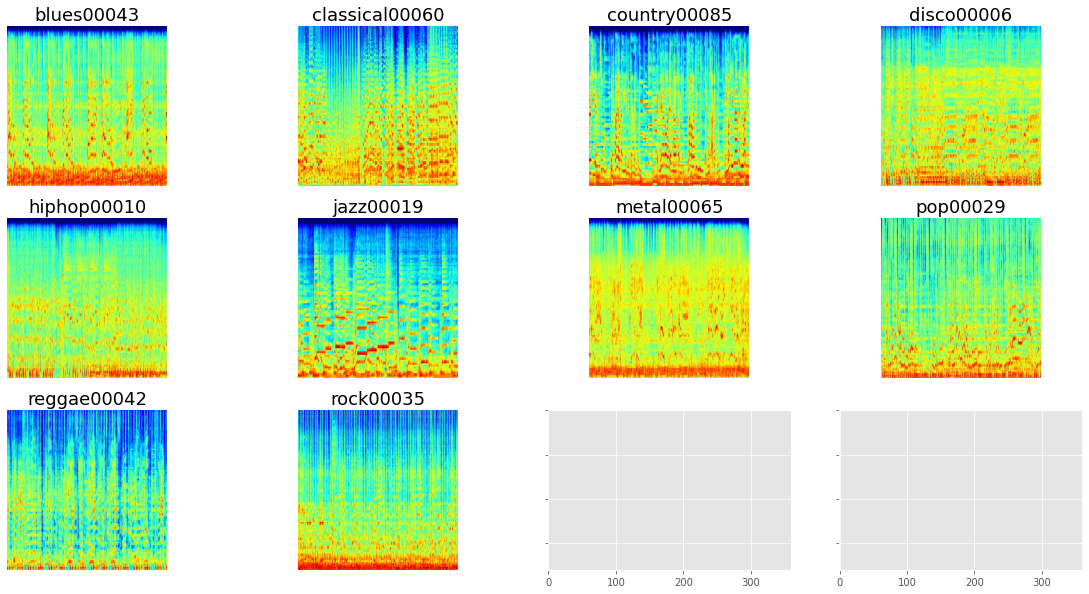

In [ ]:
f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(20,10))
coordinates = [(0,0),(0,1),(0,2),(0,3), 
               (1,0),(1,1),(1,2), (1,3),
               (2, 0), (2, 1)]

for i, file_ in enumerate(sample_files):
    im = Image.open(IMG_DIR + file_)
    # im = im.resize((IMG_WIDTH, IMG_HEIGHT), resample = Image.ANTIALIAS)
    axarr[coordinates[i]].imshow(np.asarray(im))
    axarr[coordinates[i]].axis('off')
    axarr[coordinates[i]].set_title(file_[:-4], fontsize=18)

In [ ]:
import keras
conv_base = keras.applications.VGG16(include_top = False, 
                                            weights = 'imagenet', 
                                            input_shape = (IMG_WIDTH, IMG_HEIGHT, 3) # 3 channels - RGB
                                           ) 
# The weights are for the CONV filters - hence you can pass any pre-set image size to this VGG network
# Need not be 224 x 224 x 3 (Although does it work better for 224 size? Need to check)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten()) # Flatten output and send it to MLP

# 1-layer MLP with Dropout, BN 
model.add(layers.Dense(512, name='dense_1', kernel_regularizer=regularizers.l2(L2_LAMBDA)))
model.add(layers.Dropout(rate=0.3, name='dropout_1')) # Can try varying dropout rates
model.add(layers.Activation(activation='relu', name='activation_1'))

model.add(layers.Dense(NUM_CLASSES, activation='softmax', name='dense_output'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_output (Dense)         (None, 10)                5130      
Total params: 24,157,514
Trainable params: 24,157,514
Non-trainable params: 0
____________________________________________

In [ ]:
# Set the convolution base to be not trainable
conv_base.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_output (Dense)         (None, 10)                5130      
Total params: 24,157,514
Trainable params: 9,442,826
Non-trainable params: 14,714,688
____________________________________

In [ ]:
def load_batch(file_list):
    img_array = []
    idx_array = []
    label_array = []

    for file_ in file_list:
        im = Image.open(IMG_DIR + file_)
        im = im.resize((IMG_WIDTH, IMG_HEIGHT), Image.ANTIALIAS)
        img_array.append(np.array(im))

        vals = file_[:-9].split('_')
        idx_array.append(vals[0])
        label_array.append([label_dict[vals[0]]])
    label_array = one_hot.fit_transform(label_array).toarray()
    img_array = np.array(img_array)/255.0 # Normalize RGB
    
    return img_array, np.array(label_array), np.array(idx_array)

In [ ]:
def batch_generator(files, BATCH_SIZE):
    L = len(files)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = 0
        batch_end = BATCH_SIZE

        while batch_start < L:
            
            limit = min(batch_end, L)
            file_list = files[batch_start: limit]
            batch_img_array, batch_label_array, batch_idx_array = load_batch(file_list)

            yield (batch_img_array, batch_label_array) # a tuple with two numpy arrays with batch_size samples     

            batch_start += BATCH_SIZE   
            batch_end += BATCH_SIZE

In [ ]:
# Set optimizer, loss and metrics
optimizer = optimizers.Adam(lr=1e-5)

loss = 'categorical_crossentropy'

metrics = ['categorical_accuracy']

filepath="saved_models/transfer_learning_epoch_{epoch:02d}_{val_categorical_accuracy:.4f}.h5"
checkpoint = callbacks.ModelCheckpoint(filepath, 
                                       monitor='val_categorical_accuracy', 
                                       verbose=0, 
                                       save_best_only=False)
callbacks_list = [checkpoint]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
STEPS_PER_EPOCH = len(train_files)//BATCH_SIZE
VAL_STEPS = len(val_files)//BATCH_SIZE

history = model.fit_generator(generator  = batch_generator(train_files, BATCH_SIZE),
                              epochs     = NUM_EPOCHS,
                              steps_per_epoch = STEPS_PER_EPOCH,
                              class_weight = cl_weight,
                              validation_data = batch_generator(val_files, BATCH_SIZE), 
                              validation_steps = VAL_STEPS, 
                              callbacks = callbacks_list,
                             )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
28/28 [==============================] - 27s 314ms/step - loss: 3.5946 - categorical_accuracy: 0.0940 - val_loss: 3.1680 - val_categorical_accuracy: 0.1867
Epoch 2/10
28/28 [==============================] - 7s 261ms/step - loss: 3.1788 - categorical_accuracy: 0.1852 - val_loss: 3.0036 - val_categorical_accuracy: 0.3000
Epoch 3/10
28/28 [==============================] - 8s 279ms/step - loss: 3.0051 - categorical_accuracy: 0.2851 - val_loss: 2.8635 - val_categorical_accuracy: 0.3667
Epoch 4/10
28/28 [==============================] - 8s 276ms/step - loss: 2.7949 - categorical_accuracy: 0.4007 - val_loss: 2.7589 - val_categorical_accuracy: 0.3933
Epoch 5/10
28/28 [==============================] - 8s 283ms/step - loss: 2.6775 - categorical_accuracy: 0.4173 - val_loss: 2.6527 - val_categorical_accuracy: 0.4600
Epoch 6/10
28/28 [==============================] - 7s 262ms/step - loss: 2.5582 - categorical_accuracy: 0.4599 - val_loss: 2.5720 - val_categorical_accuracy: 0.4800
Epo

In [ ]:
# Save scores on train and validation sets
with open('pickle_files/transfer_learning_vgg16_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
# Load scores
with open('pickle_files/transfer_learning_vgg16_history.pkl', 'rb') as f:
    scores = pickle.load(f)
print(scores.keys())
scores = pd.DataFrame(scores, index=range(1,11))

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


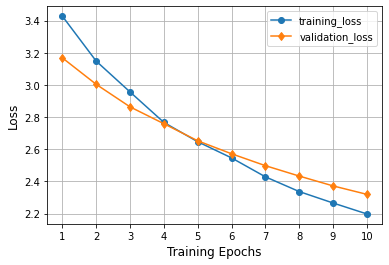

In [ ]:
plt.xticks(range(1,11))
plt.plot(scores['loss'], marker='o', label='training_loss')
plt.plot(scores['val_loss'], marker='d', label='validation_loss')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Training Epochs', fontsize=12)
plt.grid()
plt.legend()

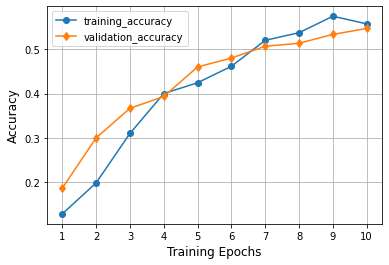

In [ ]:
plt.xticks(range(1,11))
plt.plot(scores['categorical_accuracy'], marker='o', label='training_accuracy')
plt.plot(scores['val_categorical_accuracy'], marker='d', label='validation_accuracy')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Training Epochs', fontsize=12)
plt.grid()
plt.legend()

In [ ]:
model = models.load_model(filepath='saved_models/transfer_learning_epoch_07_0.4933.h5')

In [ ]:
# Make Prediction on Test set
TEST_STEPS = len(test_files)//BATCH_SIZE
pred_probs = model.predict_generator(generator = batch_generator(test_files, BATCH_SIZE), 
                                     steps=TEST_STEPS)
pred = np.argmax(pred_probs, axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from scipy import interp
import itertools
from itertools import cycle
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

Test set size:  150
Confusion matrix, without normalization
[[ 7  0  2  1  0  0  4  0  0  0]
 [ 0 10  1  0  0  1  0  1  0  0]
 [ 0  0  9  0  0  4  1  0  0  0]
 [ 1  2  1  4  2  0  0  6  0  2]
 [ 0  0  0  0 13  0  2  1  0  0]
 [ 0  3  0  0  0  9  0  1  0  0]
 [ 0  0  0  0  0  0 21  0  0  0]
 [ 0  0  1  0  0  3  1  7  0  0]
 [ 1  0  1  1  2  1  0  1  6  0]
 [ 1  2  1  1  1  0  2  3  0  5]]


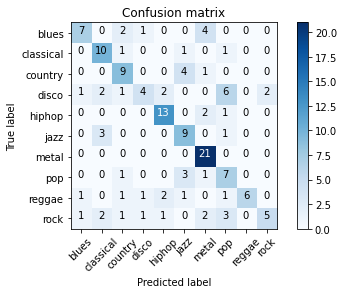

In [ ]:
print("Test set size: ", len(test_files))
plot_confusion_matrix(confusion_matrix(y_true=test_labels[:len(pred)], y_pred=pred), 
                      classes=label_dict.keys())

In [ ]:
print('Test Set Accuracy =  {0:.2f}'.format(accuracy_score(y_true=test_labels[:len(pred)], y_pred=pred)))
print('Test Set F-score =  {0:.2f}'.format(f1_score(y_true=test_labels[:len(pred)], y_pred=pred, average='macro')))

Test Set Accuracy =  0.61
Test Set F-score =  0.58


In [ ]:
one_hot_true = one_hot_encoder(test_labels, len(pred), len(label_dict))
print('ROC AUC = {0:.3f}'.format(roc_auc_score(y_true=one_hot_true, y_score=pred_probs, average='macro')))

ROC AUC = 0.901


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()


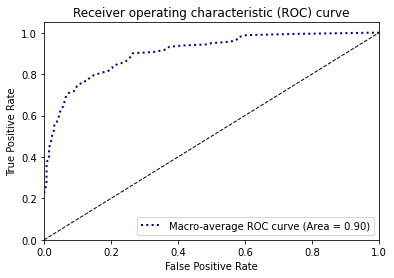

In [ ]:
# Compute macro-average ROC curve and ROC area
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(one_hot_true[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])    

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(NUM_CLASSES)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(NUM_CLASSES):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= NUM_CLASSES

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (Area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
stats  = precision_recall_fscore_support(y_true=test_labels[:len(pred)], y_pred=pred)
print("per class precision: ", stats[0])
print("per class recall: ", stats[1])
print("per class fscore: ", stats[2])

per class precision:  [0.7        0.58823529 0.5625     0.57142857 0.72222222 0.5
 0.67741935 0.35       1.         0.71428571]
per class recall:  [0.5        0.76923077 0.64285714 0.22222222 0.8125     0.69230769
 1.         0.58333333 0.46153846 0.3125    ]
per class fscore:  [0.58333333 0.66666667 0.6        0.32       0.76470588 0.58064516
 0.80769231 0.4375     0.63157895 0.43478261]


# CNN Models for Music Genre Classification Using Spectrograms

**Code in the following subsections have been heavily modified from code on this [Github repository.](https://github.com/kwontaeheon/gtzan_music_genre_classification)**

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from scipy import interp
import itertools
from itertools import cycle
import matplotlib as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import compute_class_weight
import os
from sklearn.model_selection import train_test_split

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

In [ ]:
IMG_DIR = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Project/spectrogram_images'

# Randomly select 1 spectrogram from each category for plotting
sample_files = [
                'blues00043.jpg',
                'classical00060.jpg',
                'country00085.jpg',
                'disco00006.jpg',
                'hiphop00010.jpg',
                'jazz00019.jpg',
                'metal00065.jpg',
                'pop00029.jpg',
                'reggae00042.jpg',
                'rock00035.jpg'
]

label_list = np.array([0,1,2,3,4,5,6,7,8,9])
one_hot = OneHotEncoder(categories=[np.unique(label_list)])
one_hot.fit(label_list.reshape(-1, 1))

all_files = os.listdir(IMG_DIR)

label_dict = {
              'blues': 0,
              'classical':1,
              'country':2,
              'disco':3,
              'hiphop':4,
              'jazz':5,
              'metal':6,
              'pop':7,
              'reggae':8,
              'rock':9
}
# Get class weights
label_array = []
for file_ in all_files:
    vals = file_[:-9].split('_')
    label_array.append(label_dict[vals[0]])

cl_weight = compute_class_weight(class_weight = 'balanced', 
                                 classes = np.unique(label_array), 
                                 y = label_array)
cl_weight = {i : cl_weight[i] for i in range(10)}

# Train-val-test split of files
train_files, test_files, train_labels, test_labels = train_test_split(all_files, 
                                                                      label_array,
                                                                      random_state = 10, 
                                                                      test_size = 0.3
                                                                     )

# Among the test files, keep half for validation
val_files, test_files, val_labels, test_labels = train_test_split(test_files, test_labels,
                                                                  random_state = 10, 
                                                                  test_size = 0.5
                                                                 )

In [ ]:
def load_batch(file_list):
    img_array = []
    idx_array = []
    label_array = []

    for file_ in file_list:
        im = Image.open(IMG_DIR + file_)
        im = im.resize((IMG_WIDTH, IMG_HEIGHT), Image.ANTIALIAS)
        img_array.append(np.array(im))

        vals = file_[:-9].split('_')
        idx_array.append(vals[0])
        label_array.append([label_dict[vals[0]]])
    label_array = one_hot.fit_transform(label_array).toarray()
    img_array = np.array(img_array)/255.0 # Normalize RGB
    
    return img_array, np.array(label_array), np.array(idx_array)

In [ ]:
def batch_generator(files, BATCH_SIZE):
    L = len(files)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = 0
        batch_end = BATCH_SIZE

        while batch_start < L:
            
            limit = min(batch_end, L)
            file_list = files[batch_start: limit]
            batch_img_array, batch_label_array, batch_idx_array = load_batch(file_list)

            yield (batch_img_array, batch_label_array) # a tuple with two numpy arrays with batch_size samples     

            batch_start += BATCH_SIZE   
            batch_end += BATCH_SIZE

In [ ]:
print(train_files)
from matplotlib import image
IMG_PATH = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Project/spectrogram_images/'
train_imgs = []
train_labels = []
for i in range(len(train_files)):
  print(i)
  train_imgs.append(np.resize(image.imread(IMG_PATH + train_files[i]), (128, 128, 3)))
  f = train_files[i]
  f = f[:-9]
  train_labels.append(label_dict[f])

val_imgs = []
val_labels = []
for i in range(len(val_files)):
  print(i)
  val_imgs.append(np.resize(image.imread(IMG_PATH + val_files[i]), (128, 128, 3)))
  f = val_files[i]
  f = f[:-9]
  val_labels.append(label_dict[f])

test_imgs = []
test_labels = []
for i in range(len(test_files)):
  print(i)
  test_imgs.append(np.resize(image.imread(IMG_PATH + test_files[i]), (128, 128, 3)))
  f = test_files[i]
  f = f[:-9]
  test_labels.append(label_dict[f])

['jazz00048.jpg', 'disco00072.jpg', 'classical00071.jpg', 'rock00098.jpg', 'rock00081.jpg', 'reggae00039.jpg', 'rock00088.jpg', 'hiphop00081.jpg', 'jazz00075.jpg', 'hiphop00036.jpg', 'disco00024.jpg', 'reggae00010.jpg', 'country00040.jpg', 'jazz00042.jpg', 'reggae00085.jpg', 'pop00025.jpg', 'blues00093.jpg', 'blues00051.jpg', 'country00090.jpg', 'reggae00053.jpg', 'pop00077.jpg', 'pop00046.jpg', 'disco00089.jpg', 'hiphop00050.jpg', 'blues00094.jpg', 'disco00018.jpg', 'jazz00002.jpg', 'rock00005.jpg', 'reggae00033.jpg', 'classical00041.jpg', 'jazz00088.jpg', 'reggae00076.jpg', 'disco00098.jpg', 'reggae00009.jpg', 'pop00021.jpg', 'jazz00013.jpg', 'rock00060.jpg', 'blues00071.jpg', 'rock00017.jpg', 'reggae00017.jpg', 'jazz00044.jpg', 'rock00057.jpg', 'country00082.jpg', 'disco00077.jpg', 'reggae00079.jpg', 'pop00013.jpg', 'disco00059.jpg', 'country00025.jpg', 'country00011.jpg', 'hiphop00067.jpg', 'pop00042.jpg', 'disco00066.jpg', 'blues00010.jpg', 'disco00019.jpg', 'rock00025.jpg', 'hiph

In [ ]:
im = test_imgs[9]
print(im)
print(im.shape)

[[  5   0 127 ... 135   2   0]
 [130   1   1 ...   0 127   5]
 [  0 130   0 ...   0   0 143]
 ...
 [ 73 232   0 ...   0  74 254]
 [  0  61 248 ... 204  48 151]
 [255   0  72 ...  89 255  20]]
(128, 128)


In [ ]:
print(train_files[100][:-9])

country


In [ ]:
np.save(file='train_imgs', arr=train_imgs)
np.save(file='val_imgs', arr=val_imgs)
np.save(file='test_imgs', arr=test_imgs)

In [ ]:
train_imgs = np.load(file='train_imgs.npy', mmap_mode='r')
val_imgs = np.load(file='val_imgs.npy', mmap_mode='r')
test_imgs = np.load(file='test_imgs.npy', mmap_mode='r')

## Model: CRNN with Adam Optimizer

In [ ]:
import gc
import os
import ast
import sys
import configparser
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History
from keras.layers import Reshape
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Reshape
from keras.layers import Dropout, GRU, ELU, Permute
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.pooling import MaxPooling1D, MaxPooling2D
from keras.layers.pooling import GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.layers.pooling import GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
from audiomanip.audiostruct import AudioStruct
from audiomanip.audiomodels import ModelZoo
from audiomanip.audioutils import AudioUtils
from audiomanip.audioutils import MusicDataGenerator

config = configparser.ConfigParser()
config.read('params.ini')

#Configuration
GTZAN_FOLDER = config['FILE_READ']['GTZAN_FOLDER']
MODEL_PATH = config['FILE_READ']['SAVE_MODEL']
SAVE_NPY = ast.literal_eval(config['FILE_READ']['SAVE_NPY'])
TENSORBOARD_LOG_DIR = config['FILE_READ']['TENSORBOARD_LOG_DIR']
EXEC_TIMES = int(config['PARAMETERS_MODEL']['EXEC_TIMES'])
CNN_TYPE = config['PARAMETERS_MODEL']['CNN_TYPE']
OPTIMIZER = config['PARAMETERS_MODEL']['OPTIMIZER']

## CNN hyperparameters
batch_size = int(config['PARAMETERS_MODEL']['BATCH_SIZE'])
epochs = int(config['PARAMETERS_MODEL']['EPOCHS'])

if not ((CNN_TYPE == '1D') or (CNN_TYPE == '2D') or (CNN_TYPE == 'RNN')):
  raise ValueError('Argument Invalid: The options are 1D or 2D or RNN for CNN_TYPE')

# Read data
data_type = config['FILE_READ']['TYPE']
input_shape = (128, 128)
print("data_type: %s" % data_type)

## Read the .au files
if data_type == 'AUDIO_FILES':
  song_rep = AudioStruct(GTZAN_FOLDER)
  songs, genres = song_rep.getdata()

  # Save the audio files as npy files to read faster next time
  if SAVE_NPY:
    np.save(GTZAN_FOLDER + 'songs.npy', songs)
    np.save(GTZAN_FOLDER + 'genres.npy', genres)

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Not valid datatype
else:
  raise ValueError('Argument Invalid: The options are AUDIO_FILES or NPY for data_type')

print("Original songs array shape: {0}".format(songs.shape))
print("Original genre array shape: {0}".format(genres.shape))

# Train multiple times and get mean score
val_acc = []
test_history = []
test_acc = []
test_acc_mvs = []

best_acc = 0
best_cnn = None
best_history = None

# Tensorboard Callback Definition
K.set_learning_phase(1) #set learning phase

data_type: NPY
Original songs array shape: (1000, 1280, 128)
Original genre array shape: (1000, 10)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
keras.backend.clear_session()
tbCallBack = keras.callbacks.TensorBoard(log_dir=TENSORBOARD_LOG_DIR,
 histogram_freq=3,
 write_grads=True,
 write_graph=True,
 write_images=True)

# Split the dataset into training and test
X_train, X_test, y_train, y_labels = train_test_split(
  songs, genres, test_size=0.1, stratify=genres)

# Split training set into training and validation
X_train, X_Val, y_train, y_val = train_test_split(
  X_train, y_train, test_size=1/6, stratify=y_train)

# split the train, test and validation data in size 128x128
X_Val, y_val = AudioUtils().splitsongs_melspect(X_Val, y_val, CNN_TYPE)
X_test, y_test = AudioUtils().splitsongs_melspect(X_test, y_labels, CNN_TYPE)
X_train, y_train = AudioUtils().splitsongs_melspect(X_train, y_train, CNN_TYPE)

# Construct the model
if CNN_TYPE == '1D':
  cnn = ModelZoo.cnn_melspect_1D(input_shape)
elif CNN_TYPE == '2D':
  cnn = ModelZoo.cnn_melspect_2D((*input_shape, 1))
elif CNN_TYPE == 'RNN':
  cnn = ModelZoo.crnn_melspect_2D((1280, 128, 1))

print("\nTrain shape: {0}".format(X_train.shape))
print("Validation shape: {0}".format(X_Val.shape))
print("Test shape: {0}\n".format(X_test.shape))
print("Size of the CNN: %s\n" % cnn.count_params())

# Optimizers
if OPTIMIZER == 'sgd':
  sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=1e-5, nesterov=True)
elif OPTIMIZER == 'adam':
  adam = keras.optimizers.Adam(lr=5e-3) # lr=0.001 #, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

# Compiler for the model
cnn.compile(loss='binary_crossentropy', #loss=keras.losses.categorical_crossentropy,
  optimizer=adam,
  metrics=['accuracy'])

# Early stop
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
  min_delta=0,
  patience=2,
  verbose=0,
  mode='auto')

# Fit the model
history = cnn.fit(X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_Val, y_val),
  callbacks = [earlystop])

score = cnn.evaluate(X_test, y_test, verbose=0)
score_val = cnn.evaluate(X_Val, y_val, verbose=0)

# Majority Voting System
pred_values = np.argmax(cnn.predict(X_test), axis = 1)
mvs_truth, mvs_res = AudioUtils().voting(np.argmax(y_test, axis = 1), pred_values)
acc_mvs = accuracy_score(mvs_truth, mvs_res)
labels = np.where(y_labels==1)[1]
one_hot_true = one_hot_encoder(labels, len(pred_values), 10)
mvs_roc_auc = roc_auc_score(one_hot_true, mvs_res.reshape(-1, 1), multi_class='ovo')

# Save metrics
val_acc.append(score_val[1])
test_acc.append(score[1])
test_history.append(history)
test_acc_mvs.append(acc_mvs)

# Print metrics
print('Test accuracy:', score[1])
print('Test accuracy for Majority Voting System:', acc_mvs)
print('Test auc_roc_score for Majority Voting System:', mvs_roc_auc)

# Print the confusion matrix for Voting System
cm = confusion_matrix(mvs_truth, mvs_res)
print(cm)

# Records Best Model
if (best_acc < acc_mvs):
    best_acc = acc_mvs
    best_cnn = cnn
    best_history = history
    print('best_acc changed:', best_acc)

original X shape:  (150, 1280, 128)
2D X shape:  (150, 1280, 128, 1)
original X shape:  (100, 1280, 128)
2D X shape:  (100, 1280, 128, 1)
original X shape:  (750, 1280, 128)
2D X shape:  (750, 1280, 128, 1)
input_shape:  (1280, 128, 1)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1280, 128, 1)]    0         
_________________________________________________________________
conv1 (Conv2D)               (None, 1278, 126, 64)     640       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 1278, 126, 64)     5112      
_________________________________________________________________
elu (ELU)                    (None, 1278, 126, 64)     0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 639, 63, 64)       0         
_______________________

Confusion matrix, without normalization
[[ 0  1  0  0  1  7  0  0  0  1]
 [ 0  0  0  0  1  2  4  0  0  3]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  8  0  0  1]
 [ 0  0  3  0  6  1  0  0  0  0]
 [ 0  0  0  0  5  4  0  0  0  1]
 [ 0  0  0  0  0  4  6  0  0  0]
 [ 0  0  0  0  2  6  2  0  0  0]
 [ 0  4  0  0  0  3  2  0  1  0]
 [ 0  0  0  0  6  4  0  0  0  0]]


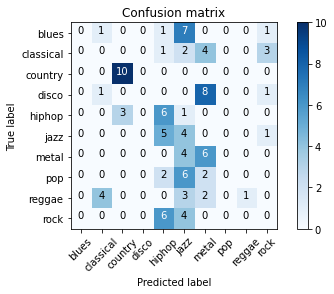

In [ ]:
label_dict = {
              'blues': 0,
              'classical':1,
              'country':2,
              'disco':3,
              'hiphop':4,
              'jazz':5,
              'metal':6,
              'pop':7,
              'reggae':8,
              'rock':9
}
plot_confusion_matrix(confusion_matrix(y_true=labels[:len(pred_values)], y_pred=pred_values), 
                      classes=label_dict.keys())

In [ ]:
mvs_truth, mvs_res

(array([8, 3, 2, 2, 8, 7, 1, 2, 5, 7, 8, 1, 3, 8, 0, 0, 7, 1, 3, 2, 5, 5,
        0, 7, 6, 4, 4, 2, 4, 2, 7, 5, 5, 6, 0, 6, 4, 1, 9, 9, 5, 9, 2, 9,
        1, 0, 4, 5, 5, 5, 3, 8, 3, 3, 2, 9, 5, 9, 8, 2, 7, 1, 6, 3, 9, 8,
        6, 7, 9, 0, 6, 4, 0, 1, 0, 7, 4, 8, 3, 1, 6, 4, 7, 6, 1, 4, 8, 8,
        3, 0, 1, 2, 7, 0, 9, 9, 3, 6, 6, 4]),
 array([5, 6, 2, 2, 1, 6, 9, 2, 4, 5, 5, 9, 6, 5, 1, 5, 4, 6, 6, 2, 4, 5,
        4, 6, 5, 4, 4, 2, 2, 2, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 5, 4, 2, 4,
        6, 5, 2, 9, 4, 5, 6, 6, 1, 6, 2, 5, 4, 4, 8, 2, 5, 6, 6, 6, 5, 6,
        6, 5, 5, 5, 6, 4, 5, 6, 5, 5, 4, 1, 6, 5, 6, 4, 4, 5, 5, 2, 1, 1,
        6, 5, 9, 2, 5, 9, 5, 4, 9, 6, 6, 4]))

## Model: CRNN with SGD Optimizer

In [ ]:
import gc
import os
import ast
import sys
import configparser
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History
from keras.layers import Reshape
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Reshape
from keras.layers import Dropout, GRU, ELU, Permute
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.pooling import MaxPooling1D, MaxPooling2D
from keras.layers.pooling import GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.layers.pooling import GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
from audiomanip.audiostruct import AudioStruct
from audiomanip.audiomodels import ModelZoo
from audiomanip.audioutils import AudioUtils
from audiomanip.audioutils import MusicDataGenerator

config = configparser.ConfigParser()
config.read('RNN_sgd_params.ini')

#Configuration
GTZAN_FOLDER = config['FILE_READ']['GTZAN_FOLDER']
MODEL_PATH = config['FILE_READ']['SAVE_MODEL']
SAVE_NPY = ast.literal_eval(config['FILE_READ']['SAVE_NPY'])
TENSORBOARD_LOG_DIR = config['FILE_READ']['TENSORBOARD_LOG_DIR']
EXEC_TIMES = int(config['PARAMETERS_MODEL']['EXEC_TIMES'])
CNN_TYPE = config['PARAMETERS_MODEL']['CNN_TYPE']
OPTIMIZER = config['PARAMETERS_MODEL']['OPTIMIZER']

## CNN hyperparameters
batch_size = int(config['PARAMETERS_MODEL']['BATCH_SIZE'])
epochs = int(config['PARAMETERS_MODEL']['EPOCHS'])

if not ((CNN_TYPE == '1D') or (CNN_TYPE == '2D') or (CNN_TYPE == 'RNN')):
  raise ValueError('Argument Invalid: The options are 1D or 2D or RNN for CNN_TYPE')

# Read data
data_type = config['FILE_READ']['TYPE']
input_shape = (128, 128)
print("data_type: %s" % data_type)

## Read the .au files
if data_type == 'AUDIO_FILES':
  song_rep = AudioStruct(GTZAN_FOLDER)
  songs, genres = song_rep.getdata()

  # Save the audio files as npy files to read faster next time
  if SAVE_NPY:
    np.save(GTZAN_FOLDER + 'songs.npy', songs)
    np.save(GTZAN_FOLDER + 'genres.npy', genres)

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Not valid datatype
else:
  raise ValueError('Argument Invalid: The options are AUDIO_FILES or NPY for data_type')

print("Original songs array shape: {0}".format(songs.shape))
print("Original genre array shape: {0}".format(genres.shape))

# Train multiple times and get mean score
val_acc = []
test_history = []
test_acc = []
test_acc_mvs = []

best_acc = 0
best_cnn = None
best_history = None

# Tensorboard Callback Definition
K.set_learning_phase(1) #set learning phase

data_type: NPY
Original songs array shape: (1000, 1280, 128)
Original genre array shape: (1000, 10)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
keras.backend.clear_session()
tbCallBack = keras.callbacks.TensorBoard(log_dir=TENSORBOARD_LOG_DIR,
 histogram_freq=3,
 write_grads=True,
 write_graph=True,
 write_images=True)

# Split the dataset into training and test
X_train, X_test, y_train, y_labels = train_test_split(
  songs, genres, test_size=0.1, stratify=genres)

# Split training set into training and validation
X_train, X_Val, y_train, y_val = train_test_split(
  X_train, y_train, test_size=1/6, stratify=y_train)

# split the train, test and validation data in size 128x128
X_Val, y_val = AudioUtils().splitsongs_melspect(X_Val, y_val, CNN_TYPE)
X_test, y_test = AudioUtils().splitsongs_melspect(X_test, y_labels, CNN_TYPE)
X_train, y_train = AudioUtils().splitsongs_melspect(X_train, y_train, CNN_TYPE)

# Construct the model
if CNN_TYPE == '1D':
  cnn = ModelZoo.cnn_melspect_1D(input_shape)
elif CNN_TYPE == '2D':
  cnn = ModelZoo.cnn_melspect_2D((*input_shape, 1))
elif CNN_TYPE == 'RNN':
  cnn = ModelZoo.crnn_melspect_2D((1280, 128, 1))

print("\nTrain shape: {0}".format(X_train.shape))
print("Validation shape: {0}".format(X_Val.shape))
print("Test shape: {0}\n".format(X_test.shape))
print("Size of the CNN: %s\n" % cnn.count_params())

# Optimizers
if OPTIMIZER == 'sgd':
  sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=1e-5, nesterov=True)
elif OPTIMIZER == 'adam':
  adam = keras.optimizers.Adam(lr=5e-3) # lr=0.001 #, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

# Compiler for the model
cnn.compile(loss='binary_crossentropy', #loss=keras.losses.categorical_crossentropy,
  optimizer=sgd,
  metrics=['accuracy'])

# Early stop
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
  min_delta=0,
  patience=2,
  verbose=0,
  mode='auto')

# Fit the model
history = cnn.fit(X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_Val, y_val),
  callbacks = [earlystop])

score = cnn.evaluate(X_test, y_test, verbose=0)
score_val = cnn.evaluate(X_Val, y_val, verbose=0)

# Majority Voting System
pred_values = np.argmax(cnn.predict(X_test), axis = 1)
mvs_truth, mvs_res = AudioUtils().voting(np.argmax(y_test, axis = 1), pred_values)
acc_mvs = accuracy_score(mvs_truth, mvs_res)
labels = np.where(y_labels==1)[1]
one_hot_true = one_hot_encoder(labels, len(pred_values), 10)
mvs_roc_auc = roc_auc_score(one_hot_true, mvs_res.reshape(-1, 1), multi_class='ovo')

# Save metrics
val_acc.append(score_val[1])
test_acc.append(score[1])
test_history.append(history)
test_acc_mvs.append(acc_mvs)

# Print metrics
print('Test accuracy:', score[1])
print('Test accuracy for Majority Voting System:', acc_mvs)
print('Test auc_roc_score for Majority Voting System:', mvs_roc_auc)

# Print the confusion matrix for Voting System
cm = confusion_matrix(mvs_truth, mvs_res)
print(cm)

# Records Best Model
if (best_acc < acc_mvs):
    best_acc = acc_mvs
    best_cnn = cnn
    best_history = history
    print('best_acc changed:', best_acc)

original X shape:  (150, 1280, 128)
2D X shape:  (150, 1280, 128, 1)
original X shape:  (100, 1280, 128)
2D X shape:  (100, 1280, 128, 1)
original X shape:  (750, 1280, 128)
2D X shape:  (750, 1280, 128, 1)
input_shape:  (1280, 128, 1)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1280, 128, 1)]    0         
_________________________________________________________________
conv1 (Conv2D)               (None, 1278, 126, 64)     640       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 1278, 126, 64)     5112      
_________________________________________________________________
elu (ELU)                    (None, 1278, 126, 64)     0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 639, 63, 64)       0         
_______________________

Confusion matrix, without normalization
[[0 3 2 3 0 2 0 0 0 0]
 [0 2 0 6 0 2 0 0 0 0]
 [0 0 9 0 0 1 0 0 0 0]
 [0 1 0 9 0 0 0 0 0 0]
 [0 0 8 0 1 1 0 0 0 0]
 [2 0 1 2 0 5 0 0 0 0]
 [0 1 0 7 0 1 1 0 0 0]
 [0 2 1 1 1 4 0 1 0 0]
 [1 1 0 6 0 1 0 1 0 0]
 [0 1 2 2 2 3 0 0 0 0]]


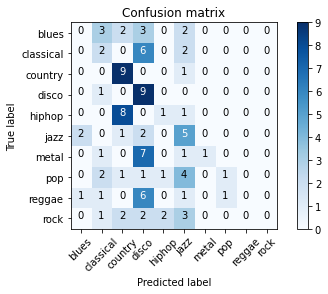

In [ ]:
label_dict = {
              'blues': 0,
              'classical':1,
              'country':2,
              'disco':3,
              'hiphop':4,
              'jazz':5,
              'metal':6,
              'pop':7,
              'reggae':8,
              'rock':9
}
plot_confusion_matrix(confusion_matrix(y_true=labels[:len(pred_values)], y_pred=pred_values), 
                      classes=label_dict.keys())

In [ ]:
mvs_truth, mvs_res

(array([6, 4, 1, 0, 2, 4, 2, 3, 7, 8, 3, 2, 5, 3, 9, 5, 8, 1, 0, 0, 8, 0,
        1, 3, 9, 1, 6, 1, 3, 5, 3, 8, 8, 7, 1, 8, 2, 3, 7, 8, 1, 8, 5, 4,
        4, 2, 6, 3, 9, 9, 7, 4, 0, 1, 9, 8, 7, 6, 5, 4, 2, 9, 0, 3, 8, 6,
        7, 5, 1, 9, 0, 7, 6, 1, 7, 5, 7, 4, 4, 5, 6, 6, 6, 5, 0, 9, 4, 0,
        0, 9, 3, 9, 7, 2, 2, 5, 2, 4, 2, 6]),
 array([3, 2, 1, 5, 2, 2, 2, 3, 1, 3, 3, 5, 0, 3, 4, 5, 5, 5, 2, 5, 7, 3,
        1, 1, 5, 5, 5, 3, 3, 3, 3, 3, 1, 1, 3, 0, 2, 3, 2, 3, 3, 3, 5, 5,
        2, 2, 3, 3, 2, 5, 4, 2, 1, 3, 2, 3, 5, 3, 3, 4, 2, 5, 1, 3, 3, 3,
        7, 5, 3, 4, 3, 5, 3, 3, 5, 0, 3, 2, 2, 5, 3, 6, 3, 5, 1, 1, 2, 2,
        3, 3, 3, 3, 5, 2, 2, 2, 2, 2, 2, 1]))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
labels = np.where(y_labels==1)[1]
stats  = precision_recall_fscore_support(y_true=labels, y_pred=pred_values)
print("per class precision: ", stats[0])
print("per class recall: ", stats[1])
print("per class fscore: ", stats[2])

per class precision:  [0.         0.18181818 0.39130435 0.25       0.25       0.25
 1.         0.5        0.         0.        ]
per class recall:  [0.  0.2 0.9 0.9 0.1 0.5 0.1 0.1 0.  0. ]
per class fscore:  [0.         0.19047619 0.54545455 0.39130435 0.14285714 0.33333333
 0.18181818 0.16666667 0.         0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model: 1-D CNN with Adam Optimizer

In [ ]:
import gc
import os
import ast
import sys
import configparser
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History
from keras.layers import Reshape
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Reshape
from keras.layers import Dropout, GRU, ELU, Permute
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.pooling import MaxPooling1D, MaxPooling2D
from keras.layers.pooling import GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.layers.pooling import GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
from audiomanip.audiostruct import AudioStruct
from audiomanip.audiomodels import ModelZoo
from audiomanip.audioutils import AudioUtils
from audiomanip.audioutils import MusicDataGenerator

config = configparser.ConfigParser()
config.read('1D_adam_params.ini')

#Configuration
GTZAN_FOLDER = config['FILE_READ']['GTZAN_FOLDER']
MODEL_PATH = config['FILE_READ']['SAVE_MODEL']
SAVE_NPY = ast.literal_eval(config['FILE_READ']['SAVE_NPY'])
TENSORBOARD_LOG_DIR = config['FILE_READ']['TENSORBOARD_LOG_DIR']
EXEC_TIMES = int(config['PARAMETERS_MODEL']['EXEC_TIMES'])
CNN_TYPE = config['PARAMETERS_MODEL']['CNN_TYPE']
OPTIMIZER = config['PARAMETERS_MODEL']['OPTIMIZER']

## CNN hyperparameters
batch_size = int(config['PARAMETERS_MODEL']['BATCH_SIZE'])
epochs = int(config['PARAMETERS_MODEL']['EPOCHS'])

if not ((CNN_TYPE == '1D') or (CNN_TYPE == '2D') or (CNN_TYPE == 'RNN')):
  raise ValueError('Argument Invalid: The options are 1D or 2D or RNN for CNN_TYPE')

# Read data
data_type = config['FILE_READ']['TYPE']
input_shape = (128, 128)
print("data_type: %s" % data_type)

## Read the .au files
if data_type == 'AUDIO_FILES':
  song_rep = AudioStruct(GTZAN_FOLDER)
  songs, genres = song_rep.getdata()

  # Save the audio files as npy files to read faster next time
  if SAVE_NPY:
    np.save(GTZAN_FOLDER + 'songs.npy', songs)
    np.save(GTZAN_FOLDER + 'genres.npy', genres)

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Not valid datatype
else:
  raise ValueError('Argument Invalid: The options are AUDIO_FILES or NPY for data_type')

print("Original songs array shape: {0}".format(songs.shape))
print("Original genre array shape: {0}".format(genres.shape))

# Train multiple times and get mean score
val_acc = []
test_history = []
test_acc = []
test_acc_mvs = []

best_acc = 0
best_cnn = None
best_history = None

# Tensorboard Callback Definition
K.set_learning_phase(1) #set learning phase

data_type: NPY
Original songs array shape: (1000, 1280, 128)
Original genre array shape: (1000, 10)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
keras.backend.clear_session()
tbCallBack = keras.callbacks.TensorBoard(log_dir=TENSORBOARD_LOG_DIR,
 histogram_freq=3,
 write_grads=True,
 write_graph=True,
 write_images=True)

# Split the dataset into training and test
X_train, X_test, y_train, y_labels = train_test_split(
  songs, genres, test_size=0.1, stratify=genres)

# Split training set into training and validation
X_train, X_Val, y_train, y_val = train_test_split(
  X_train, y_train, test_size=1/6, stratify=y_train)

# split the train, test and validation data in size 128x128
X_Val, y_val = AudioUtils().splitsongs_melspect(X_Val, y_val, CNN_TYPE)
X_test, y_test = AudioUtils().splitsongs_melspect(X_test, y_labels, CNN_TYPE)
X_train, y_train = AudioUtils().splitsongs_melspect(X_train, y_train, CNN_TYPE)

# Construct the model
if CNN_TYPE == '1D':
  cnn = ModelZoo.cnn_melspect_1D((1280, 128))
elif CNN_TYPE == '2D':
  cnn = ModelZoo.cnn_melspect_2D((*input_shape, 1))
elif CNN_TYPE == 'RNN':
  cnn = ModelZoo.crnn_melspect_2D((1280, 128, 1))

print("\nTrain shape: {0}".format(X_train.shape))
print("Validation shape: {0}".format(X_Val.shape))
print("Test shape: {0}\n".format(X_test.shape))
print("Size of the CNN: %s\n" % cnn.count_params())

# Optimizers
if OPTIMIZER == 'sgd':
  sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=1e-5, nesterov=True)
elif OPTIMIZER == 'adam':
  adam = keras.optimizers.Adam(lr=5e-3) # lr=0.001 #, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

# Compiler for the model
cnn.compile(loss='binary_crossentropy', #loss=keras.losses.categorical_crossentropy,
  optimizer=adam,
  metrics=['accuracy'])

# Early stop
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
  min_delta=0,
  patience=2,
  verbose=0,
  mode='auto')

# Fit the model
history = cnn.fit(X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_Val, y_val),
  callbacks = [earlystop])

score = cnn.evaluate(X_test, y_test, verbose=0)
score_val = cnn.evaluate(X_Val, y_val, verbose=0)

# Majority Voting System
pred_values = np.argmax(cnn.predict(X_test), axis = 1)
mvs_truth, mvs_res = AudioUtils().voting(np.argmax(y_test, axis = 1), pred_values)
acc_mvs = accuracy_score(mvs_truth, mvs_res)
labels = np.where(y_labels==1)[1]
one_hot_true = one_hot_encoder(labels, len(pred_values), 10)
mvs_roc_auc = roc_auc_score(one_hot_true, mvs_res.reshape(-1, 1), multi_class='ovo')

# Save metrics
val_acc.append(score_val[1])
test_acc.append(score[1])
test_history.append(history)
test_acc_mvs.append(acc_mvs)

# Print metrics
print('Test accuracy:', score[1])
print('Test accuracy for Majority Voting System:', acc_mvs)
print('Test auc_roc_score for Majority Voting System:', mvs_roc_auc)

# Print the confusion matrix for Voting System
cm = confusion_matrix(mvs_truth, mvs_res)
print(cm)

# Records Best Model
if (best_acc < acc_mvs):
    best_acc = acc_mvs
    best_cnn = cnn
    best_history = history
    print('best_acc changed:', best_acc)

original X shape:  (150, 1280, 128)
original X shape:  (100, 1280, 128)
original X shape:  (750, 1280, 128)
input_shape:  (1280, 128)

Train shape: (750, 1280, 128)
Validation shape: (150, 1280, 128)
Test shape: (100, 1280, 128)

Size of the CNN: 443498

Epoch 1/100
24/24 [==============================] - 3s 29ms/step - loss: 1.5145 - accuracy: 0.1200 - val_loss: 1.2636 - val_accuracy: 0.1667
Epoch 2/100
24/24 [==============================] - 0s 20ms/step - loss: 0.3875 - accuracy: 0.2471 - val_loss: 0.6859 - val_accuracy: 0.2200
Epoch 3/100
24/24 [==============================] - 0s 19ms/step - loss: 0.3331 - accuracy: 0.2543 - val_loss: 0.3801 - val_accuracy: 0.2733
Epoch 4/100
24/24 [==============================] - 0s 20ms/step - loss: 0.3232 - accuracy: 0.2390 - val_loss: 0.3384 - val_accuracy: 0.3000
Epoch 5/100
24/24 [==============================] - 0s 20ms/step - loss: 0.3006 - accuracy: 0.3278 - val_loss: 0.2833 - val_accuracy: 0.3267
Epoch 6/100
24/24 [================

In [ ]:
mvs_truth, mvs_res

(array([0, 9, 5, 9, 6, 7, 7, 8, 8, 6, 0, 6, 8, 2, 6, 2, 1, 2, 2, 8, 1, 8,
        0, 4, 6, 2, 3, 0, 4, 7, 0, 4, 7, 3, 1, 4, 9, 9, 8, 5, 3, 1, 0, 5,
        7, 2, 4, 9, 6, 1, 6, 9, 2, 1, 6, 3, 4, 1, 0, 9, 2, 5, 3, 6, 6, 5,
        5, 0, 9, 7, 4, 3, 7, 0, 7, 1, 5, 2, 9, 4, 3, 9, 3, 0, 5, 4, 3, 2,
        8, 5, 1, 8, 8, 3, 4, 1, 7, 8, 7, 5]),
 array([6, 0, 0, 0, 6, 7, 7, 1, 3, 6, 0, 0, 7, 2, 6, 2, 1, 2, 2, 1, 1, 8,
        0, 7, 6, 4, 6, 0, 4, 5, 4, 2, 7, 1, 6, 7, 6, 1, 8, 5, 6, 8, 0, 5,
        0, 2, 7, 7, 6, 1, 3, 0, 2, 6, 6, 6, 5, 7, 6, 5, 2, 7, 7, 6, 5, 0,
        0, 7, 2, 7, 2, 6, 7, 0, 3, 6, 1, 5, 7, 5, 3, 0, 1, 6, 6, 7, 6, 2,
        1, 7, 1, 8, 3, 8, 2, 7, 7, 5, 7, 5]))

Confusion matrix, without normalization
[[5 0 0 0 1 0 3 1 0 0]
 [0 4 0 0 0 0 3 2 1 0]
 [0 0 8 0 1 1 0 0 0 0]
 [0 2 0 1 0 0 5 1 1 0]
 [0 0 3 0 1 2 0 4 0 0]
 [3 1 0 0 0 3 1 2 0 0]
 [1 0 0 1 0 1 7 0 0 0]
 [1 0 0 1 0 1 0 7 0 0]
 [0 3 0 2 0 1 0 1 3 0]
 [4 1 1 0 0 1 1 2 0 0]]


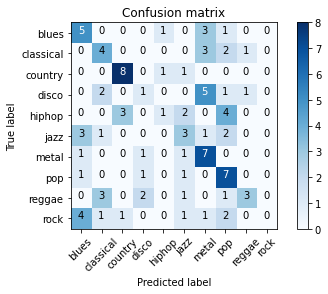

In [ ]:
label_dict = {
              'blues': 0,
              'classical':1,
              'country':2,
              'disco':3,
              'hiphop':4,
              'jazz':5,
              'metal':6,
              'pop':7,
              'reggae':8,
              'rock':9
}
plot_confusion_matrix(confusion_matrix(y_true=labels[:len(pred_values)], y_pred=pred_values), 
                      classes=label_dict.keys())

## Model: 1-D CNN with SGD Optimizer

In [ ]:
import gc
import os
import ast
import sys
import configparser
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History
from keras.layers import Reshape
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Reshape
from keras.layers import Dropout, GRU, ELU, Permute
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.pooling import MaxPooling1D, MaxPooling2D
from keras.layers.pooling import GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.layers.pooling import GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
from audiomanip.audiostruct import AudioStruct
from audiomanip.audiomodels import ModelZoo
from audiomanip.audioutils import AudioUtils
from audiomanip.audioutils import MusicDataGenerator

config = configparser.ConfigParser()
config.read('1D_sgd_params.ini')

#Configuration
GTZAN_FOLDER = config['FILE_READ']['GTZAN_FOLDER']
MODEL_PATH = config['FILE_READ']['SAVE_MODEL']
SAVE_NPY = ast.literal_eval(config['FILE_READ']['SAVE_NPY'])
TENSORBOARD_LOG_DIR = config['FILE_READ']['TENSORBOARD_LOG_DIR']
EXEC_TIMES = int(config['PARAMETERS_MODEL']['EXEC_TIMES'])
CNN_TYPE = config['PARAMETERS_MODEL']['CNN_TYPE']
OPTIMIZER = config['PARAMETERS_MODEL']['OPTIMIZER']

## CNN hyperparameters
batch_size = int(config['PARAMETERS_MODEL']['BATCH_SIZE'])
epochs = int(config['PARAMETERS_MODEL']['EPOCHS'])

if not ((CNN_TYPE == '1D') or (CNN_TYPE == '2D') or (CNN_TYPE == 'RNN')):
  raise ValueError('Argument Invalid: The options are 1D or 2D or RNN for CNN_TYPE')

# Read data
data_type = config['FILE_READ']['TYPE']
input_shape = (128, 128)
print("data_type: %s" % data_type)

## Read the .au files
if data_type == 'AUDIO_FILES':
  song_rep = AudioStruct(GTZAN_FOLDER)
  songs, genres = song_rep.getdata()

  # Save the audio files as npy files to read faster next time
  if SAVE_NPY:
    np.save(GTZAN_FOLDER + 'songs.npy', songs)
    np.save(GTZAN_FOLDER + 'genres.npy', genres)

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Not valid datatype
else:
  raise ValueError('Argument Invalid: The options are AUDIO_FILES or NPY for data_type')

print("Original songs array shape: {0}".format(songs.shape))
print("Original genre array shape: {0}".format(genres.shape))

# Train multiple times and get mean score
val_acc = []
test_history = []
test_acc = []
test_acc_mvs = []

best_acc = 0
best_cnn = None
best_history = None

# Tensorboard Callback Definition
K.set_learning_phase(1) #set learning phase

data_type: NPY
Original songs array shape: (1000, 1280, 128)
Original genre array shape: (1000, 10)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
keras.backend.clear_session()
tbCallBack = keras.callbacks.TensorBoard(log_dir=TENSORBOARD_LOG_DIR,
 histogram_freq=3,
 write_grads=True,
 write_graph=True,
 write_images=True)

# Split the dataset into training and test
X_train, X_test, y_train, y_labels = train_test_split(
  songs, genres, test_size=0.1, stratify=genres)

# Split training set into training and validation
X_train, X_Val, y_train, y_val = train_test_split(
  X_train, y_train, test_size=1/6, stratify=y_train)

# split the train, test and validation data in size 128x128
X_Val, y_val = AudioUtils().splitsongs_melspect(X_Val, y_val, CNN_TYPE)
X_test, y_test = AudioUtils().splitsongs_melspect(X_test, y_labels, CNN_TYPE)
X_train, y_train = AudioUtils().splitsongs_melspect(X_train, y_train, CNN_TYPE)

# Construct the model
if CNN_TYPE == '1D':
  cnn = ModelZoo.cnn_melspect_1D((1280, 128))
elif CNN_TYPE == '2D':
  cnn = ModelZoo.cnn_melspect_2D((*input_shape, 1))
elif CNN_TYPE == 'RNN':
  cnn = ModelZoo.crnn_melspect_2D((1280, 128, 1))

print("\nTrain shape: {0}".format(X_train.shape))
print("Validation shape: {0}".format(X_Val.shape))
print("Test shape: {0}\n".format(X_test.shape))
print("Size of the CNN: %s\n" % cnn.count_params())

# Optimizers
if OPTIMIZER == 'sgd':
  sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=1e-5, nesterov=True)
elif OPTIMIZER == 'adam':
  adam = keras.optimizers.Adam(lr=5e-3) # lr=0.001 #, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

# Compiler for the model
cnn.compile(loss='binary_crossentropy', #loss=keras.losses.categorical_crossentropy,
  optimizer=sgd,
  metrics=['accuracy'])

# Early stop
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
  min_delta=0,
  patience=2,
  verbose=0,
  mode='auto')

# Fit the model
history = cnn.fit(X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_Val, y_val),
  callbacks = [earlystop])

score = cnn.evaluate(X_test, y_test, verbose=0)
score_val = cnn.evaluate(X_Val, y_val, verbose=0)

# Majority Voting System
pred_values = np.argmax(cnn.predict(X_test), axis = 1)
mvs_truth, mvs_res = AudioUtils().voting(np.argmax(y_test, axis = 1), pred_values)
acc_mvs = accuracy_score(mvs_truth, mvs_res)
labels = np.where(y_labels==1)[1]
one_hot_true = one_hot_encoder(labels, len(pred_values), 10)
mvs_roc_auc = roc_auc_score(one_hot_true, mvs_res.reshape(-1, 1), multi_class='ovo')

# Save metrics
val_acc.append(score_val[1])
test_acc.append(score[1])
test_history.append(history)
test_acc_mvs.append(acc_mvs)

# Print metrics
print('Test accuracy:', score[1])
print('Test accuracy for Majority Voting System:', acc_mvs)
print('Test auc_roc_score for Majority Voting System:', mvs_roc_auc)

# Print the confusion matrix for Voting System
cm = confusion_matrix(mvs_truth, mvs_res)
print(cm)

# Records Best Model
if (best_acc < acc_mvs):
    best_acc = acc_mvs
    best_cnn = cnn
    best_history = history
    print('best_acc changed:', best_acc)

original X shape:  (150, 1280, 128)
original X shape:  (100, 1280, 128)
original X shape:  (750, 1280, 128)
input_shape:  (1280, 128)

Train shape: (750, 1280, 128)
Validation shape: (150, 1280, 128)
Test shape: (100, 1280, 128)

Size of the CNN: 443498

Epoch 1/100
24/24 [==============================] - 2s 37ms/step - loss: 1.7362 - accuracy: 0.0954 - val_loss: 1.4583 - val_accuracy: 0.1000
Epoch 2/100
24/24 [==============================] - 1s 24ms/step - loss: 0.9941 - accuracy: 0.0914 - val_loss: 0.6384 - val_accuracy: 0.1133
Epoch 3/100
24/24 [==============================] - 1s 22ms/step - loss: 0.8118 - accuracy: 0.1301 - val_loss: 0.5033 - val_accuracy: 0.1467
Epoch 4/100
24/24 [==============================] - 1s 23ms/step - loss: 0.6682 - accuracy: 0.1396 - val_loss: 0.4149 - val_accuracy: 0.1533
Epoch 5/100
24/24 [==============================] - 1s 23ms/step - loss: 0.6072 - accuracy: 0.1426 - val_loss: 0.3916 - val_accuracy: 0.1933
Epoch 6/100
24/24 [================

Confusion matrix, without normalization
[[0 1 2 2 0 0 1 0 1 3]
 [0 2 0 1 0 0 1 1 3 2]
 [0 0 9 0 0 0 0 1 0 0]
 [1 2 0 5 0 0 1 1 0 0]
 [0 0 4 0 0 4 0 0 0 2]
 [1 2 1 0 0 4 0 0 0 2]
 [0 1 0 0 0 1 6 1 0 1]
 [1 0 0 2 0 1 2 4 0 0]
 [2 0 1 0 0 0 1 0 4 2]
 [0 1 4 0 0 2 0 1 0 2]]


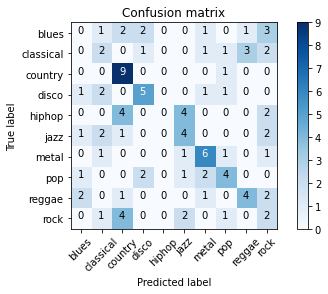

In [ ]:
label_dict = {
              'blues': 0,
              'classical':1,
              'country':2,
              'disco':3,
              'hiphop':4,
              'jazz':5,
              'metal':6,
              'pop':7,
              'reggae':8,
              'rock':9
}
plot_confusion_matrix(confusion_matrix(y_true=labels[:len(pred_values)], y_pred=pred_values), 
                      classes=label_dict.keys())

In [ ]:
mvs_truth, mvs_res

(array([3, 4, 5, 6, 7, 8, 6, 5, 0, 0, 0, 9, 9, 1, 8, 4, 5, 6, 9, 6, 0, 1,
        8, 4, 3, 7, 5, 8, 9, 2, 3, 2, 2, 7, 9, 2, 7, 0, 7, 4, 1, 9, 1, 9,
        4, 4, 2, 8, 7, 6, 2, 1, 7, 9, 2, 8, 3, 0, 2, 1, 9, 8, 0, 5, 5, 3,
        5, 7, 1, 6, 3, 8, 0, 1, 8, 2, 3, 0, 3, 7, 5, 4, 4, 1, 1, 3, 8, 3,
        6, 4, 6, 7, 9, 2, 5, 6, 0, 6, 4, 5]),
 array([3, 5, 5, 6, 7, 0, 6, 1, 9, 6, 2, 2, 2, 7, 8, 2, 5, 6, 2, 6, 9, 1,
        0, 2, 6, 0, 2, 9, 5, 2, 3, 7, 2, 3, 2, 2, 5, 3, 6, 9, 1, 9, 8, 1,
        5, 5, 2, 8, 7, 1, 2, 6, 6, 7, 2, 6, 1, 1, 2, 8, 5, 9, 9, 1, 0, 0,
        5, 7, 8, 5, 3, 8, 8, 3, 2, 2, 3, 3, 7, 3, 5, 5, 2, 9, 9, 3, 8, 1,
        6, 9, 6, 7, 9, 2, 9, 7, 2, 9, 2, 9]))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
stats  = precision_recall_fscore_support(y_true=labels, y_pred=pred_values)
print("per class precision: ", stats[0])
print("per class recall: ", stats[1])
print("per class fscore: ", stats[2])

per class precision:  [0.         0.22222222 0.42857143 0.5        0.         0.33333333
 0.5        0.44444444 0.5        0.14285714]
per class recall:  [0.  0.2 0.9 0.5 0.  0.4 0.6 0.4 0.4 0.2]
per class fscore:  [0.         0.21052632 0.58064516 0.5        0.         0.36363636
 0.54545455 0.42105263 0.44444444 0.16666667]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model: 2-D CNN with Adam Optimizer

In [ ]:
import gc
import os
import ast
import sys
import configparser
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History
from keras.layers import Reshape
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Reshape
from keras.layers import Dropout, GRU, ELU, Permute
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.pooling import MaxPooling1D, MaxPooling2D
from keras.layers.pooling import GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.layers.pooling import GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
from audiomanip.audiostruct import AudioStruct
from audiomanip.audiomodels import ModelZoo
from audiomanip.audioutils import AudioUtils
from audiomanip.audioutils import MusicDataGenerator

config = configparser.ConfigParser()
config.read('2D_adam_params.ini')

#Configuration
GTZAN_FOLDER = config['FILE_READ']['GTZAN_FOLDER']
MODEL_PATH = config['FILE_READ']['SAVE_MODEL']
SAVE_NPY = ast.literal_eval(config['FILE_READ']['SAVE_NPY'])
TENSORBOARD_LOG_DIR = config['FILE_READ']['TENSORBOARD_LOG_DIR']
EXEC_TIMES = int(config['PARAMETERS_MODEL']['EXEC_TIMES'])
CNN_TYPE = config['PARAMETERS_MODEL']['CNN_TYPE']
OPTIMIZER = config['PARAMETERS_MODEL']['OPTIMIZER']

## CNN hyperparameters
batch_size = int(config['PARAMETERS_MODEL']['BATCH_SIZE'])
epochs = int(config['PARAMETERS_MODEL']['EPOCHS'])

if not ((CNN_TYPE == '1D') or (CNN_TYPE == '2D') or (CNN_TYPE == 'RNN')):
  raise ValueError('Argument Invalid: The options are 1D or 2D or RNN for CNN_TYPE')

# Read data
data_type = config['FILE_READ']['TYPE']
input_shape = (128, 128)
print("data_type: %s" % data_type)

## Read the .au files
if data_type == 'AUDIO_FILES':
  song_rep = AudioStruct(GTZAN_FOLDER)
  songs, genres = song_rep.getdata()

  # Save the audio files as npy files to read faster next time
  if SAVE_NPY:
    np.save(GTZAN_FOLDER + 'songs.npy', songs)
    np.save(GTZAN_FOLDER + 'genres.npy', genres)

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Not valid datatype
else:
  raise ValueError('Argument Invalid: The options are AUDIO_FILES or NPY for data_type')

print("Original songs array shape: {0}".format(songs.shape))
print("Original genre array shape: {0}".format(genres.shape))

# Train multiple times and get mean score
val_acc = []
test_history = []
test_acc = []
test_acc_mvs = []

best_acc = 0
best_cnn = None
best_history = None

# Tensorboard Callback Definition
K.set_learning_phase(1) #set learning phase

data_type: NPY
Original songs array shape: (1000, 1280, 128)
Original genre array shape: (1000, 10)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
keras.backend.clear_session()
tbCallBack = keras.callbacks.TensorBoard(log_dir=TENSORBOARD_LOG_DIR,
 histogram_freq=3,
 write_grads=True,
 write_graph=True,
 write_images=True)

# Split the dataset into training and test
X_train, X_test, y_train, y_labels = train_test_split(
  songs, genres, test_size=0.1, stratify=genres)

# Split training set into training and validation
X_train, X_Val, y_train, y_val = train_test_split(
  X_train, y_train, test_size=1/6, stratify=y_train)

# split the train, test and validation data in size 128x128
X_Val, y_val = AudioUtils().splitsongs_melspect(X_Val, y_val, CNN_TYPE)
X_test, y_test = AudioUtils().splitsongs_melspect(X_test, y_labels, CNN_TYPE)
X_train, y_train = AudioUtils().splitsongs_melspect(X_train, y_train, CNN_TYPE)

# Construct the model
if CNN_TYPE == '1D':
  cnn = ModelZoo.cnn_melspect_1D(input_shape)
elif CNN_TYPE == '2D':
  cnn = ModelZoo.cnn_melspect_2D((1280, 128, 1))
elif CNN_TYPE == 'RNN':
  cnn = ModelZoo.crnn_melspect_2D((1280, 128, 1))

print("\nTrain shape: {0}".format(X_train.shape))
print("Validation shape: {0}".format(X_Val.shape))
print("Test shape: {0}\n".format(X_test.shape))
print("Size of the CNN: %s\n" % cnn.count_params())

# Optimizers
if OPTIMIZER == 'sgd':
  sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=1e-5, nesterov=True)
elif OPTIMIZER == 'adam':
  adam = keras.optimizers.Adam(lr=5e-3) # lr=0.001 #, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

# Compiler for the model
cnn.compile(loss='binary_crossentropy', #loss=keras.losses.categorical_crossentropy,
  optimizer=adam,
  metrics=['accuracy'])

# Early stop
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
  min_delta=0,
  patience=2,
  verbose=0,
  mode='auto')

# Fit the model
history = cnn.fit(X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_Val, y_val),
  callbacks = [earlystop])

score = cnn.evaluate(X_test, y_test, verbose=0)
score_val = cnn.evaluate(X_Val, y_val, verbose=0)

# Majority Voting System
pred_values = np.argmax(cnn.predict(X_test), axis = 1)
mvs_truth, mvs_res = AudioUtils().voting(np.argmax(y_test, axis = 1), pred_values)
acc_mvs = accuracy_score(mvs_truth, mvs_res)
labels = np.where(y_labels==1)[1]
one_hot_true = one_hot_encoder(labels, len(pred_values), 10)
mvs_roc_auc = roc_auc_score(one_hot_true, mvs_res.reshape(-1, 1), multi_class='ovo')

# Save metrics
val_acc.append(score_val[1])
test_acc.append(score[1])
test_history.append(history)
test_acc_mvs.append(acc_mvs)

# Print metrics
print('Test accuracy:', score[1])
print('Test accuracy for Majority Voting System:', acc_mvs)
print('Test auc_roc_score for Majority Voting System:', mvs_roc_auc)

# Print the confusion matrix for Voting System
cm = confusion_matrix(mvs_truth, mvs_res)
print(cm)

# Records Best Model
if (best_acc < acc_mvs):
    best_acc = acc_mvs
    best_cnn = cnn
    best_history = history
    print('best_acc changed:', best_acc)

original X shape:  (150, 1280, 128)
2D X shape:  (150, 1280, 128, 1)
original X shape:  (100, 1280, 128)
2D X shape:  (100, 1280, 128, 1)
original X shape:  (750, 1280, 128)
2D X shape:  (750, 1280, 128, 1)
input_shape:  (1280, 128, 1)

Train shape: (750, 1280, 128, 1)
Validation shape: (150, 1280, 128, 1)
Test shape: (100, 1280, 128, 1)

Size of the CNN: 492938

Epoch 1/100
24/24 [==============================] - 5s 150ms/step - loss: 6.4795 - accuracy: 0.0887 - val_loss: 3.8587 - val_accuracy: 0.1133
Epoch 2/100
24/24 [==============================] - 3s 115ms/step - loss: 0.5162 - accuracy: 0.1782 - val_loss: 0.5023 - val_accuracy: 0.1867
Epoch 3/100
24/24 [==============================] - 3s 113ms/step - loss: 0.3535 - accuracy: 0.2146 - val_loss: 0.4942 - val_accuracy: 0.1600
Epoch 4/100
24/24 [==============================] - 3s 114ms/step - loss: 0.3482 - accuracy: 0.2018 - val_loss: 0.3589 - val_accuracy: 0.1800
Epoch 5/100
24/24 [==============================] - 3s 113ms/

Confusion matrix, without normalization
[[ 1  0  0  1  0  8  0  0  0  0]
 [ 0  1  1  0  0  7  0  0  1  0]
 [ 1  0  2  0  0  6  0  1  0  0]
 [ 0  0  0  3  0  5  0  0  2  0]
 [ 0  0  2  0  0  7  0  0  1  0]
 [ 1  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  1  0  0  0  7  0  0  2  0]
 [ 0  0  2  0  0  7  0  0  1  0]]


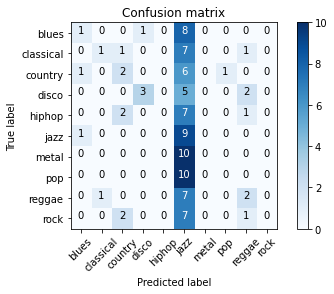

In [ ]:
label_dict = {
              'blues': 0,
              'classical':1,
              'country':2,
              'disco':3,
              'hiphop':4,
              'jazz':5,
              'metal':6,
              'pop':7,
              'reggae':8,
              'rock':9
}
plot_confusion_matrix(confusion_matrix(y_true=labels[:len(pred_values)], y_pred=pred_values), 
                      classes=label_dict.keys())

In [ ]:
mvs_truth, mvs_res

(array([4, 4, 3, 8, 0, 6, 2, 9, 4, 6, 0, 3, 9, 6, 8, 1, 1, 2, 4, 4, 9, 8,
        6, 6, 8, 6, 5, 8, 3, 9, 7, 7, 3, 1, 1, 1, 2, 1, 7, 2, 7, 5, 5, 4,
        1, 3, 6, 2, 0, 0, 7, 2, 0, 9, 8, 7, 5, 5, 3, 2, 5, 7, 8, 4, 0, 9,
        9, 9, 7, 4, 5, 8, 0, 5, 7, 3, 3, 3, 0, 0, 9, 1, 8, 9, 8, 2, 6, 2,
        5, 4, 2, 5, 6, 7, 1, 4, 6, 3, 0, 1]),
 array([2, 5, 3, 5, 5, 5, 2, 2, 8, 5, 5, 8, 8, 5, 5, 1, 5, 5, 5, 5, 5, 5,
        5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5,
        2, 3, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 2, 3, 5,
        5, 5, 5, 5, 5, 8, 0, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5, 2, 8, 5, 5, 5,
        0, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5]))

## Model: 2-D CNN with SGD Optimizer

In [ ]:
import gc
import os
import ast
import sys
import configparser
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History
from keras.layers import Reshape
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Reshape
from keras.layers import Dropout, GRU, ELU, Permute
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.pooling import MaxPooling1D, MaxPooling2D
from keras.layers.pooling import GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.layers.pooling import GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
from audiomanip.audiostruct import AudioStruct
from audiomanip.audiomodels import ModelZoo
from audiomanip.audioutils import AudioUtils
from audiomanip.audioutils import MusicDataGenerator

config = configparser.ConfigParser()
config.read('2D_sgd_params.ini')

#Configuration
GTZAN_FOLDER = config['FILE_READ']['GTZAN_FOLDER']
MODEL_PATH = config['FILE_READ']['SAVE_MODEL']
SAVE_NPY = ast.literal_eval(config['FILE_READ']['SAVE_NPY'])
TENSORBOARD_LOG_DIR = config['FILE_READ']['TENSORBOARD_LOG_DIR']
EXEC_TIMES = int(config['PARAMETERS_MODEL']['EXEC_TIMES'])
CNN_TYPE = config['PARAMETERS_MODEL']['CNN_TYPE']
OPTIMIZER = config['PARAMETERS_MODEL']['OPTIMIZER']

## CNN hyperparameters
batch_size = int(config['PARAMETERS_MODEL']['BATCH_SIZE'])
epochs = int(config['PARAMETERS_MODEL']['EPOCHS'])

if not ((CNN_TYPE == '1D') or (CNN_TYPE == '2D') or (CNN_TYPE == 'RNN')):
  raise ValueError('Argument Invalid: The options are 1D or 2D or RNN for CNN_TYPE')

# Read data
data_type = config['FILE_READ']['TYPE']
input_shape = (128, 128)
print("data_type: %s" % data_type)

## Read the .au files
if data_type == 'AUDIO_FILES':
  song_rep = AudioStruct(GTZAN_FOLDER)
  songs, genres = song_rep.getdata()

  # Save the audio files as npy files to read faster next time
  if SAVE_NPY:
    np.save(GTZAN_FOLDER + 'songs.npy', songs)
    np.save(GTZAN_FOLDER + 'genres.npy', genres)

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Read from npy file
elif data_type == 'NPY':
  songs = np.load(GTZAN_FOLDER + 'songs.npy')
  genres = np.load(GTZAN_FOLDER + 'genres.npy')

## Not valid datatype
else:
  raise ValueError('Argument Invalid: The options are AUDIO_FILES or NPY for data_type')

print("Original songs array shape: {0}".format(songs.shape))
print("Original genre array shape: {0}".format(genres.shape))

# Train multiple times and get mean score
val_acc = []
test_history = []
test_acc = []
test_acc_mvs = []

best_acc = 0
best_cnn = None
best_history = None

# Tensorboard Callback Definition
K.set_learning_phase(1) #set learning phase

data_type: NPY
Original songs array shape: (1000, 1280, 128)
Original genre array shape: (1000, 10)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
keras.backend.clear_session()
tbCallBack = keras.callbacks.TensorBoard(log_dir=TENSORBOARD_LOG_DIR,
 histogram_freq=3,
 write_grads=True,
 write_graph=True,
 write_images=True)

# Split the dataset into training and test
X_train, X_test, y_train, y_labels = train_test_split(
  songs, genres, test_size=0.1, stratify=genres)

# Split training set into training and validation
X_train, X_Val, y_train, y_val = train_test_split(
  X_train, y_train, test_size=1/6, stratify=y_train)

# split the train, test and validation data in size 128x128
X_Val, y_val = AudioUtils().splitsongs_melspect(X_Val, y_val, CNN_TYPE)
X_test, y_test = AudioUtils().splitsongs_melspect(X_test, y_labels, CNN_TYPE)
X_train, y_train = AudioUtils().splitsongs_melspect(X_train, y_train, CNN_TYPE)

# Construct the model
if CNN_TYPE == '1D':
  cnn = ModelZoo.cnn_melspect_1D(input_shape)
elif CNN_TYPE == '2D':
  cnn = ModelZoo.cnn_melspect_2D((1280, 128, 1))
elif CNN_TYPE == 'RNN':
  cnn = ModelZoo.crnn_melspect_2D((1280, 128, 1))

print("\nTrain shape: {0}".format(X_train.shape))
print("Validation shape: {0}".format(X_Val.shape))
print("Test shape: {0}\n".format(X_test.shape))
print("Size of the CNN: %s\n" % cnn.count_params())

# Optimizers
if OPTIMIZER == 'sgd':
  sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=1e-5, nesterov=True)
elif OPTIMIZER == 'adam':
  adam = keras.optimizers.Adam(lr=5e-3) # lr=0.001 #, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

# Compiler for the model
cnn.compile(loss='binary_crossentropy', #loss=keras.losses.categorical_crossentropy,
  optimizer=sgd,
  metrics=['accuracy'])

# Early stop
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
  min_delta=0,
  patience=2,
  verbose=0,
  mode='auto')

# Fit the model
history = cnn.fit(X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_Val, y_val),
  callbacks = [earlystop])

score = cnn.evaluate(X_test, y_test, verbose=0)
score_val = cnn.evaluate(X_Val, y_val, verbose=0)

# Majority Voting System
pred_values = np.argmax(cnn.predict(X_test), axis = 1)
mvs_truth, mvs_res = AudioUtils().voting(np.argmax(y_test, axis = 1), pred_values)
acc_mvs = accuracy_score(mvs_truth, mvs_res)
labels = np.where(y_labels==1)[1]
one_hot_true = one_hot_encoder(labels, len(pred_values), 10)
mvs_roc_auc = roc_auc_score(one_hot_true, mvs_res.reshape(-1, 1), multi_class='ovo')

# Save metrics
val_acc.append(score_val[1])
test_acc.append(score[1])
test_history.append(history)
test_acc_mvs.append(acc_mvs)

# Print metrics
print('Test accuracy:', score[1])
print('Test accuracy for Majority Voting System:', acc_mvs)
print('Test auc_roc_score for Majority Voting System:', mvs_roc_auc)

# Print the confusion matrix for Voting System
cm = confusion_matrix(mvs_truth, mvs_res)
print(cm)

# Records Best Model
if (best_acc < acc_mvs):
    best_acc = acc_mvs
    best_cnn = cnn
    best_history = history
    print('best_acc changed:', best_acc)

original X shape:  (150, 1280, 128)
2D X shape:  (150, 1280, 128, 1)
original X shape:  (100, 1280, 128)
2D X shape:  (100, 1280, 128, 1)
original X shape:  (750, 1280, 128)
2D X shape:  (750, 1280, 128, 1)
input_shape:  (1280, 128, 1)

Train shape: (750, 1280, 128, 1)
Validation shape: (150, 1280, 128, 1)
Test shape: (100, 1280, 128, 1)

Size of the CNN: 492938

Epoch 1/100
24/24 [==============================] - 4s 127ms/step - loss: 8.1760 - accuracy: 0.1049 - val_loss: 2.8109 - val_accuracy: 0.1267
Epoch 2/100
24/24 [==============================] - 3s 115ms/step - loss: 1.8232 - accuracy: 0.1117 - val_loss: 1.3501 - val_accuracy: 0.1133
Epoch 3/100
24/24 [==============================] - 3s 118ms/step - loss: 0.9318 - accuracy: 0.1467 - val_loss: 0.6647 - val_accuracy: 0.1200
Epoch 4/100
24/24 [==============================] - 3s 117ms/step - loss: 0.6786 - accuracy: 0.1403 - val_loss: 0.5114 - val_accuracy: 0.1867
Epoch 5/100
24/24 [==============================] - 3s 118ms/

Confusion matrix, without normalization
[[1 1 0 0 2 0 5 1 0 0]
 [0 0 0 1 1 2 2 4 0 0]
 [1 0 2 0 2 1 0 4 0 0]
 [1 0 0 2 0 0 7 0 0 0]
 [0 0 0 0 2 1 2 5 0 0]
 [0 0 0 0 1 1 2 6 0 0]
 [0 0 0 1 1 0 3 5 0 0]
 [2 0 0 1 0 1 1 5 0 0]
 [1 0 0 1 1 2 3 2 0 0]
 [1 0 0 0 0 0 5 4 0 0]]


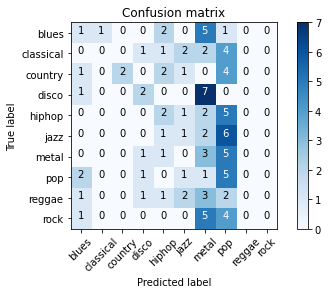

In [ ]:
label_dict = {
              'blues': 0,
              'classical':1,
              'country':2,
              'disco':3,
              'hiphop':4,
              'jazz':5,
              'metal':6,
              'pop':7,
              'reggae':8,
              'rock':9
}
plot_confusion_matrix(confusion_matrix(y_true=labels[:len(pred_values)], y_pred=pred_values), 
                      classes=label_dict.keys())

In [ ]:
mvs_truth, mvs_res

(array([9, 5, 4, 0, 7, 9, 6, 5, 3, 2, 0, 2, 1, 7, 7, 1, 5, 0, 1, 9, 2, 6,
        8, 2, 0, 9, 3, 6, 6, 9, 9, 8, 8, 1, 8, 3, 4, 4, 1, 7, 5, 2, 7, 6,
        8, 6, 1, 3, 2, 5, 5, 0, 7, 8, 0, 3, 1, 5, 5, 2, 1, 1, 4, 3, 7, 6,
        6, 0, 5, 8, 3, 1, 3, 6, 8, 3, 9, 2, 8, 4, 7, 9, 2, 4, 3, 0, 4, 9,
        4, 0, 8, 4, 4, 5, 0, 2, 7, 7, 6, 9]),
 array([6, 7, 6, 6, 7, 6, 3, 6, 0, 0, 1, 4, 7, 5, 7, 7, 7, 4, 6, 7, 4, 7,
        7, 7, 4, 7, 6, 6, 7, 7, 7, 5, 6, 5, 0, 6, 7, 6, 5, 7, 7, 2, 3, 7,
        7, 7, 7, 6, 7, 6, 5, 6, 0, 3, 6, 6, 3, 7, 4, 7, 6, 4, 7, 6, 0, 7,
        4, 0, 7, 6, 3, 7, 3, 6, 4, 6, 6, 5, 6, 7, 6, 0, 7, 7, 6, 7, 7, 6,
        4, 6, 5, 4, 5, 7, 6, 2, 7, 7, 6, 6]))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
stats  = precision_recall_fscore_support(y_true=labels, y_pred=pred_values)
print("per class precision: ", stats[0])
print("per class recall: ", stats[1])
print("per class fscore: ", stats[2])

per class precision:  [0.14285714 0.         1.         0.33333333 0.2        0.125
 0.1        0.13888889 0.         0.        ]
per class recall:  [0.1 0.  0.2 0.2 0.2 0.1 0.3 0.5 0.  0. ]
per class fscore:  [0.11764706 0.         0.33333333 0.25       0.2        0.11111111
 0.15       0.2173913  0.         0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
